# Tutorial

In [1]:
# https://satijalab.org/seurat/articles/integration_rpca.html

# Load libraries

In [2]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()
# sessionInfo()
Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/bin/python")

suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(pheatmap))
suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
suppressMessages(library("ggrepel"))

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"                     
[2] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘Matrix’ was built under R version 4.3.3”
Warning message:
“package ‘qlcMatrix’ was built under R version 4.3.3”
Warning message:
“package ‘slam’ was built under R version 4.3.3”
Warning message:
“package ‘sparsesvd’ was built under R version 4.3.3”
Warning message:
“package ‘ggeasy’ was built under R version 4.3.3”
Warning message:
“package ‘svglite’ was built under R version 4.3.3”
Warning message:
“package ‘ape’ was built under R version 4.3.3”
Warning message:
“package ‘ggforce’ was built under R version 4.3.3”
Warning message:
“package ‘edgeR’ was built under R version 4.3.3”
Warning message:
“package ‘limma’ was built under R version 4.3.3”
Warning message:
“package ‘apeglm’ was built under R version 4.3.3”
Warning message:
“package ‘DESeq2’ was bu

# Read Seurat object after new peak calling

In [3]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [4]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")


In [5]:
adata


An object of class Seurat 
670088 features across 99255 samples within 4 assays 
Active assay: SCT (33160 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, RNA_raw, ATAC
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [6]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"
[71] "Integrated_annotation"

# Try adata

In [6]:
DefaultAssay(adata)<-'RNA'

In [7]:
adata.list <- SplitObject(adata, split.by = "orig.ident")

In [8]:
#str(adata.list)

In [9]:
rm(adata)

## Apply SCT on every object in the list

In [10]:
adata.list <- lapply(X = adata.list, FUN = SCTransform, method = "glmGamPoi")


Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 28853 by 13727

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 662 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28853 genes

Computing corrected count matrix for 28853 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.560376 mins

Determine variable features

Centering data matrix

Getting residuals for block 1(of 3) for counts dataset

Getting residuals for block 2(of 3) for counts dataset

Getting residuals for block 3(of 3) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to

## select features that are repeatedly variable across datasets for integration run PCA on each dataset using these features

In [11]:
features <- SelectIntegrationFeatures(object.list = adata.list, nfeatures = 3000)


In [12]:
adata.list <- PrepSCTIntegration(object.list = adata.list, anchor.features = features)

## Run PCA on features

In [13]:
adata.list <- lapply(X = adata.list, FUN = RunPCA, features = features)


PC_ 1 
Positive:  MT-CO2, MT-CO3, MT-CYB, MT-ATP6, MT-CO1, RPLP1, EEF1A1, RPS12, RPL13A, RPS18 
	   RPS2, RPL41, PTMA, RPL13, RPS27A, RPS8, RPS15, RPL37A, RPS19, RPL19 
	   RPL28, RPL27A, GAPDH, MT-ND4, RPS24, RPS27, RPL35, RPL37, RPS14, FTL 
Negative:  KIAA0825, MALAT1, XACT, PTPRG, UNC5D, GPC6, CADM2, DLGAP1, RIMS2, ROBO2 
	   ANK2, HS3ST5, AL157778.1, RBFOX1, GULP1, ADCY2, ROR1, MAGI1, GRID2, LARGE1 
	   TRPM3, IMMP2L, FRAS1, DTNA, LPP, NLGN1, TENM3, RYR2, TMEM132D, SYT1 
PC_ 2 
Positive:  MT-CO2, MT-CO3, MT-CYB, MT-ATP6, MT-CO1, MT-ND3, MT-ND4, MT-ND1, MT-ND2, MT-ND5 
	   MTRNR2L12, MTRNR2L1, MTRNR2L8, MT-ND4L, MT-ATP8, UNC5D, ROR1, PTPRG, CADM2, NRXN1 
	   DLGAP1, KCND2, RIMS2, NLGN1, AL157778.1, GRID2, ROBO2, XACT, NLGN4X, TRPM3 
Negative:  ACTB, PTMA, EEF1A1, RPS8, RPL13A, RPS15, GAPDH, HSP90AB1, H3F3A, RPL19 
	   RPS27A, ACTG1, HSP90AA1, RPLP1, RPL13, HMGB1, RPL3, RPS18, RPL28, RPS6 
	   RPL8, VIM, RPS24, TMSB10, CALD1, RPL10, RPL37A, TAGLN, RPL27A, RPS19 
PC_ 3 
Positive:  CAL

## Find integrator anchors RPCA

In [14]:
anchors <- FindIntegrationAnchors(object.list = adata.list, normalization.method = "SCT",
    anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 5)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 354 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 345 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 671 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 364 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 603 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2952 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 514 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Findin

## IntegrateData

In [ ]:
combined.sct <- IntegrateData(anchorset = anchors, normalization.method = "SCT", dims = 1:30)


## Run PCA on integrated

In [ ]:
combined.sct <- RunPCA(combined.sct, verbose = FALSE)


## Run UMAP on integrated

In [ ]:
combined.sct <- RunUMAP(combined.sct, reduction = "pca", dims = 1:30)


## Visualization

In [ ]:
p1 <- DimPlot(combined.sct, reduction = "umap", group.by = "orig.ident")

p1

In [ ]:
p1 <- DimPlot(combined.sct, reduction = "umap", group.by = "seurat_clusters")

p1

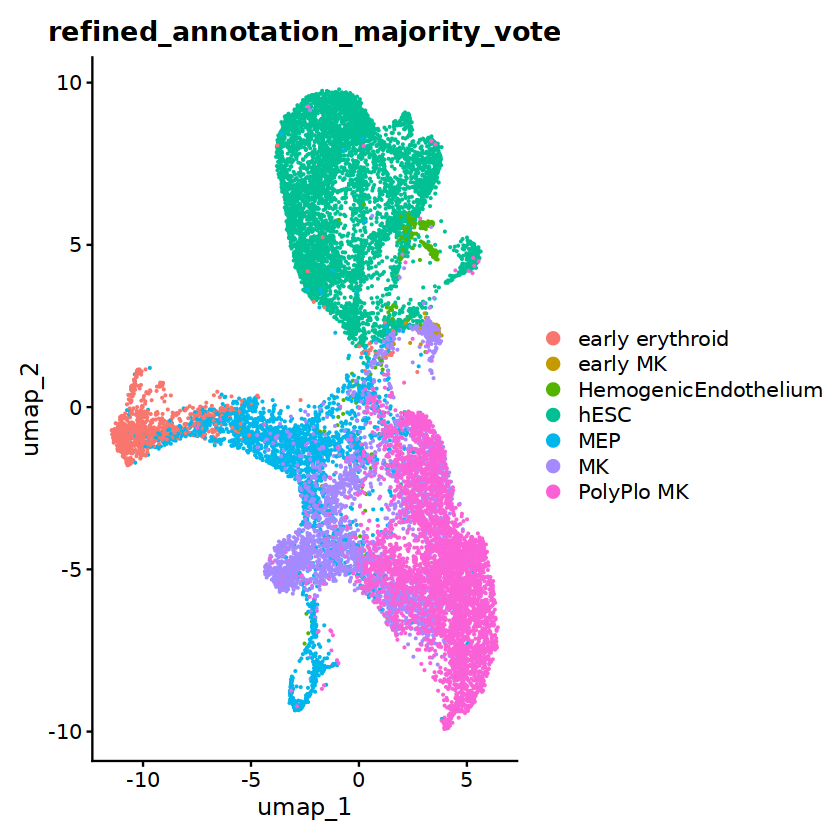

In [45]:
p1 <- DimPlot(combined.sct, reduction = "umap", group.by = "Integrated_annotation")

p1

In [47]:
current_dir<-getwd()

current_dir

[1] "/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca"

In [48]:
dir.create(paste(current_dir, 'graphs_rpca', sep='/'))

In [49]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

In [50]:
plot <- DimPlot(combined.sct, group.by = "Integrated_annotation") + xlab("UMAP 1") + ylab("UMAP 2") + theme(axis.title = element_text(size = 18),
    legend.text = element_text(size = 18)) + guides(colour = guide_legend(override.aes = list(size = 10)))

In [51]:
ggsave(filename ="UMAP_rpca_integration_Integrated_annotation.jpg", height = 7, width = 12, plot = plot,
    quality = 50)

In [52]:
plot <- DimPlot(combined.sct, group.by = "orig.ident") + xlab("UMAP 1") + ylab("UMAP 2") + theme(axis.title = element_text(size = 18),
    legend.text = element_text(size = 18)) + guides(colour = guide_legend(override.aes = list(size = 10)))

In [53]:
ggsave(filename ="UMAP_rpca_integration_orig.ident.jpg", height = 7, width = 12, plot = plot,
    quality = 50)

In [54]:
combined.sct

An object of class Seurat 
751343 features across 16835 samples within 6 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 2 dimensional reductions calculated: pca, umap

In [55]:
colnames(combined.sct@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

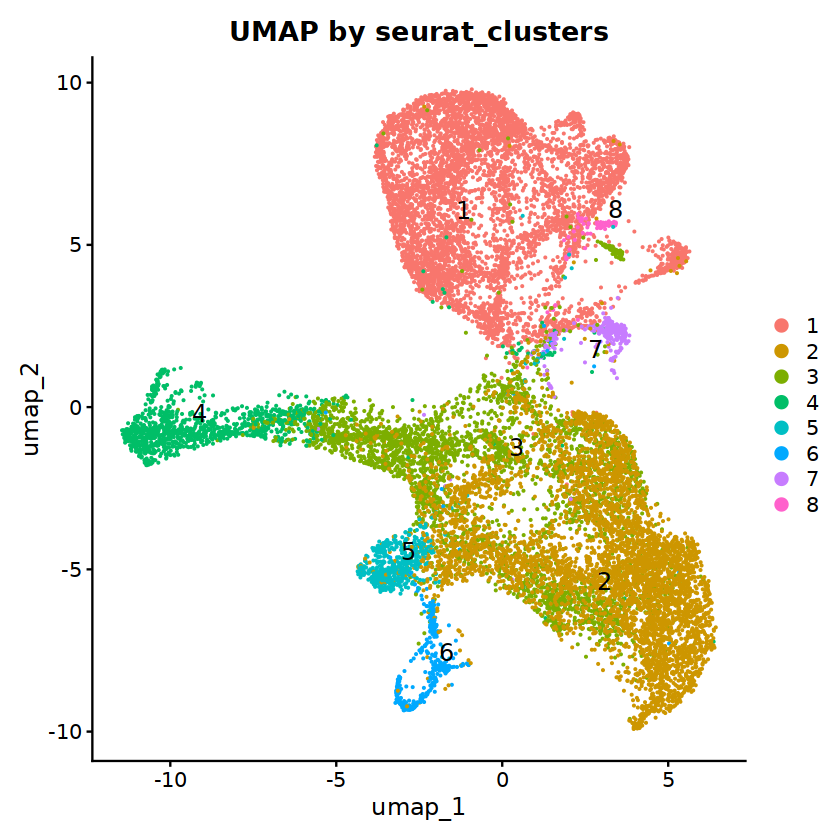

In [60]:
p3 <- DimPlot(combined.sct, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

In [62]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

svgname<-paste("UMAP_seurat_clusters",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

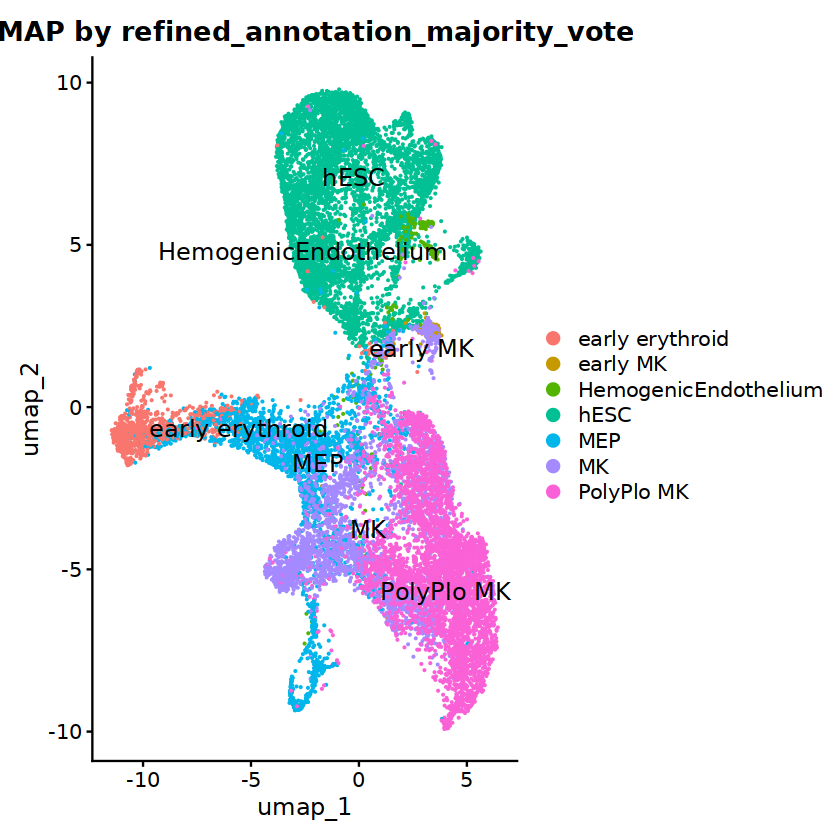

In [63]:
p3 <- DimPlot(combined.sct, reduction = "umap", group.by = "Integrated_annotation", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by Integrated_annotation")
p3

In [64]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

svgname<-paste("UMAP_Integrated_annotation",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

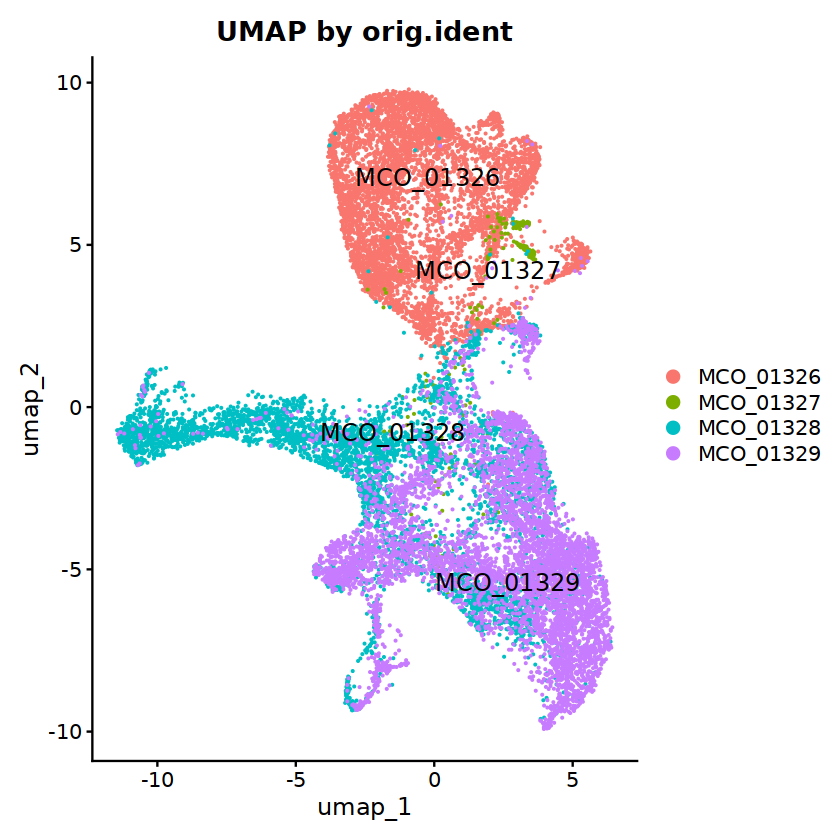

In [65]:
p3 <- DimPlot(combined.sct, reduction = "umap", group.by = "orig.ident", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by orig.ident")
p3

In [66]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

svgname<-paste("UMAP_orig.ident",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

# DotPlot

In [70]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [ ]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

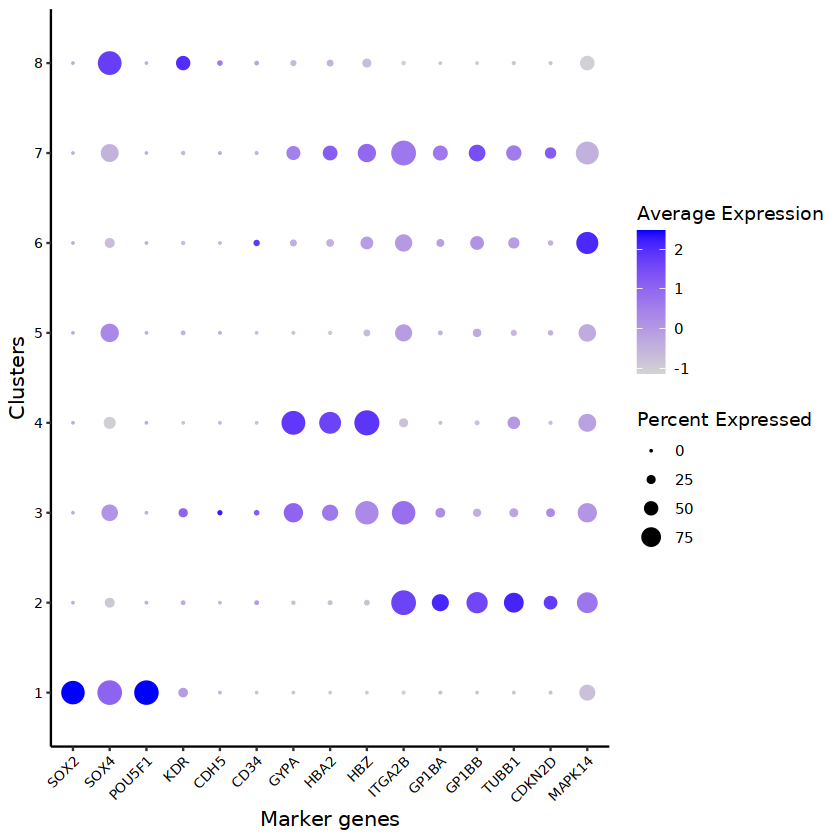

In [71]:
dotplot3<-DotPlot(
  combined.sct,
    features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

In [72]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

svgname<-paste("Dotplot_marker_genes_by_seurat_clusters",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


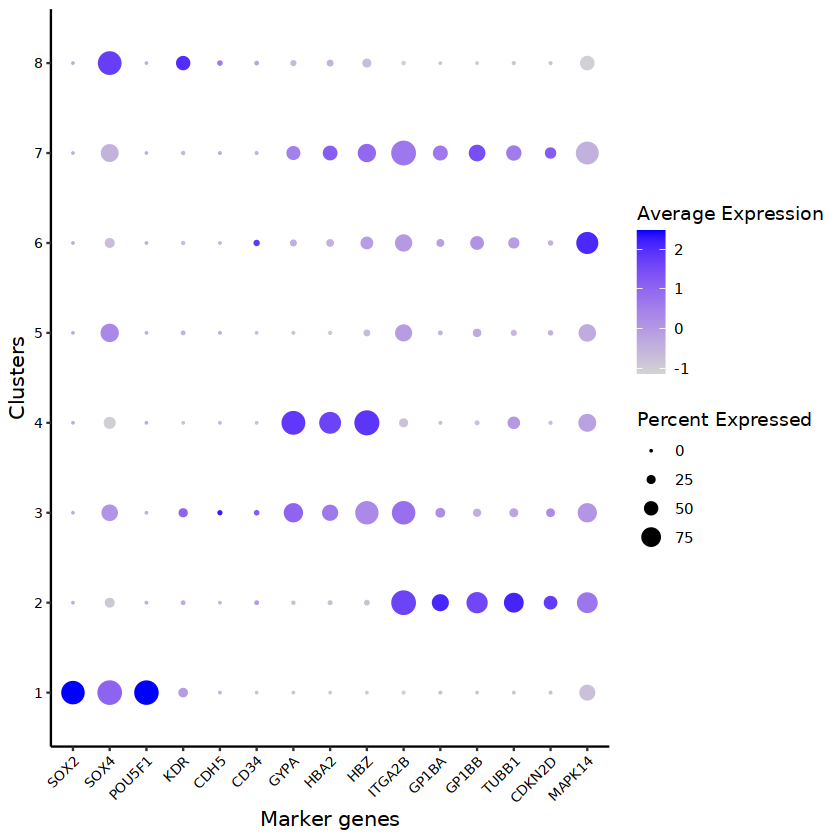

In [71]:
dotplot3<-DotPlot(
  combined.sct,
    features=new_markers,
  assay = "SCT",
    group.by="seurat_clusters")+
ylab('Clusters')+
xlab('New marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

In [72]:
setwd(paste(current_dir, 'graphs_rpca', sep='/'))

svgname<-paste("Dotplot_new_markers_by_seurat_clusters",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


## UMPA by marker genes

png 
  2

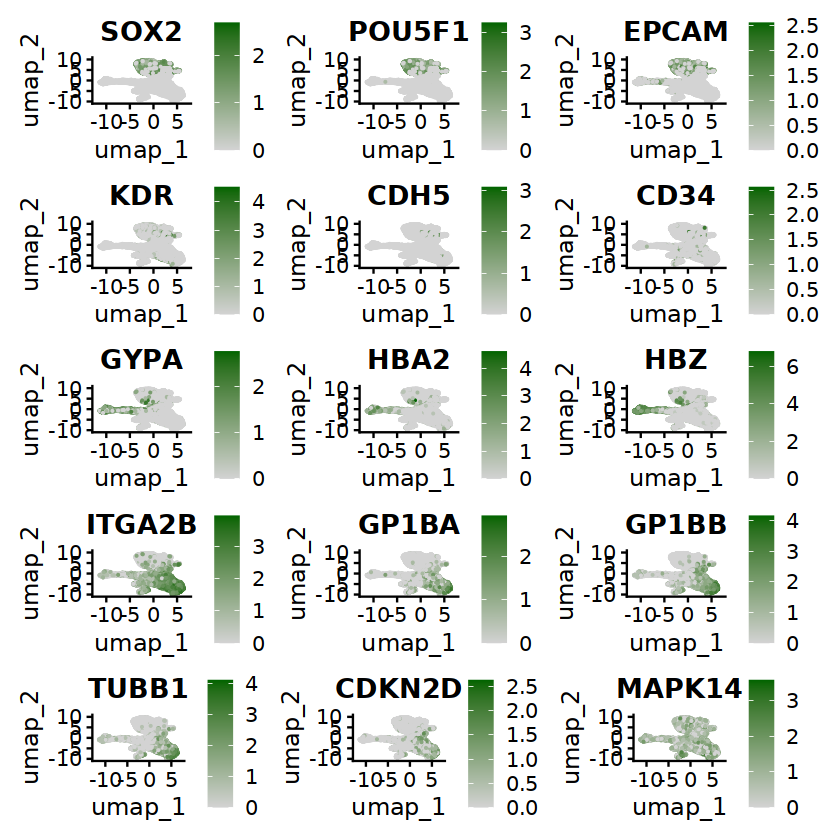

In [74]:
## Graph 

DefaultAssay(combined.sct) <- 'SCT'


p_1 <- FeaturePlot(combined.sct, features = c('SOX2','POU5F1','EPCAM'),
                  reduction = 'umap', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p_2 <- FeaturePlot(combined.sct, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p_3 <- FeaturePlot(combined.sct, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_4 <- FeaturePlot(combined.sct, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_5 <- FeaturePlot(combined.sct, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(combined.sct, features = c('PTPRC','CD3E','CD8B'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(combined.sct, features = c('TPSB2','CD14','KIT'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(combined.sct, features = c('NCAM1','NKG7','FCGR3A'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_9 <- FeaturePlot(combined.sct, features = c('PRF1','GZMB','GNLY'),
                    reduction = 'umap', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)



setwd(paste(current_dir, 'graphs_rpca', sep='/'))
png(file='UMAP_marker_genes.png', width =1000, height = 2250)
p_1 / p_2 / p_3 / p_4 / p_5 / p_6 / p_7 / p_8 / p_9
dev.off()


# SAVE OBJECT

In [56]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [57]:
saveRDS(combined.sct, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated_rpca_integrate.rds")

# Pickup after RPCA

In [103]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

In [104]:
adata<-readRDS(file="merged_clusters_after_genotyping_after_refined_annotation_new_peaks_rpca_integrate.rds")

In [105]:
adata

An object of class Seurat 
751343 features across 16835 samples within 6 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 2 dimensional reductions calculated: pca, umap

# Add graph name

In [106]:
adata <- FindNeighbors(adata)


Computing nearest neighbor graph

Computing SNN



In [107]:
names(adata@graphs)

[1] "integrated_nn"  "integrated_snn"

# Subclustering

## Visualize initial clusters

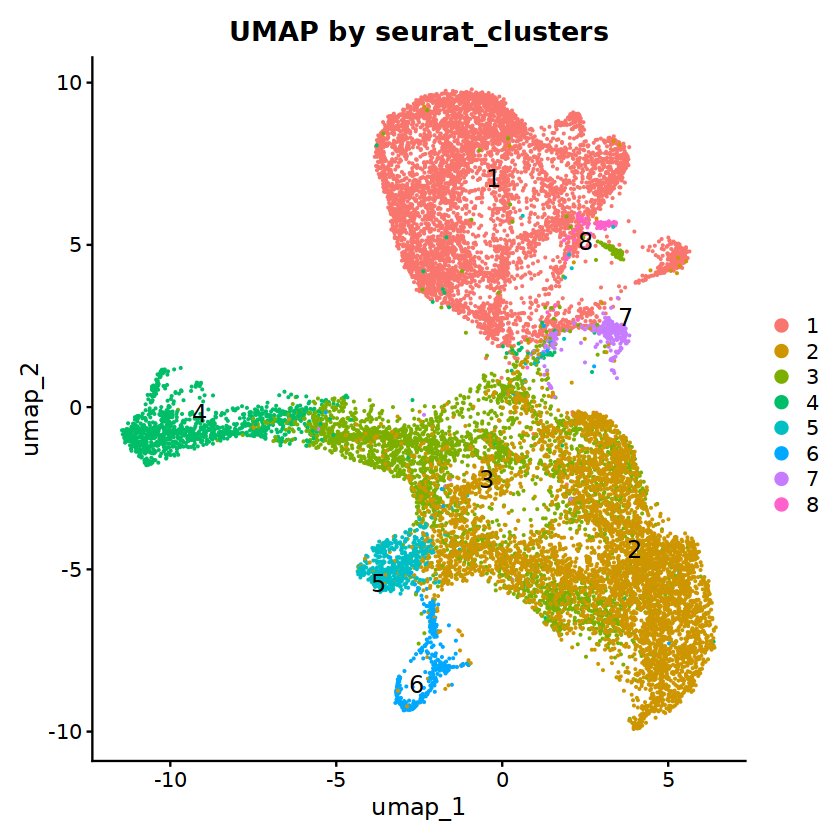

In [108]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

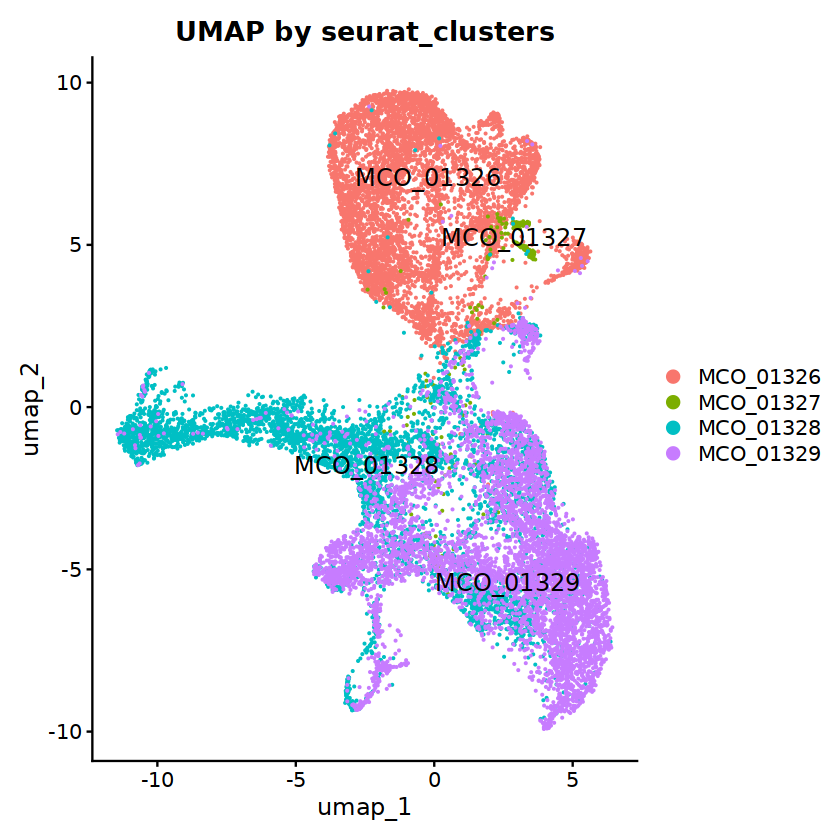

In [109]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "orig.ident", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

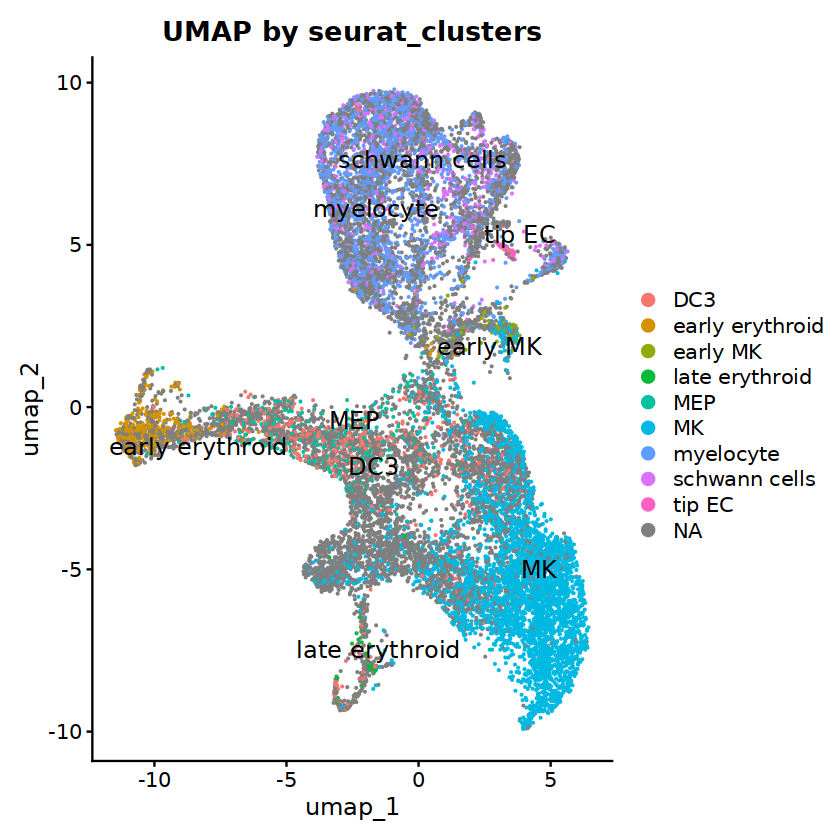

In [110]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "CellTypist_BMA_label_filtered", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

# Subcluster cluster 3

In [111]:
adata<-FindSubCluster(
  adata,
  3,
  'integrated_nn',
  subcluster.name = "Subclusters_3",
  resolution = 0.1,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3589
Number of edges: 22527

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9254
Number of communities: 48
Elapsed time: 0 seconds


38 singletons identified. 10 final clusters.



In [112]:
adata@meta.data$Subclusters_3<-as.factor(adata@meta.data$Subclusters_3)

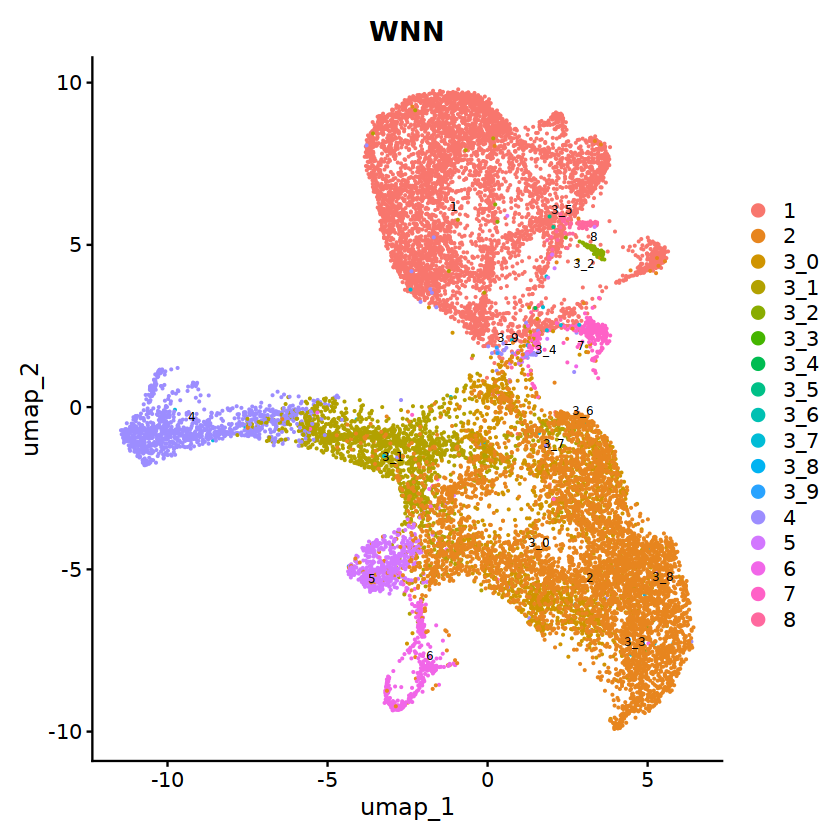

In [113]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "Subclusters_3", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


In [114]:
markers<-c('SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

# DotPlot

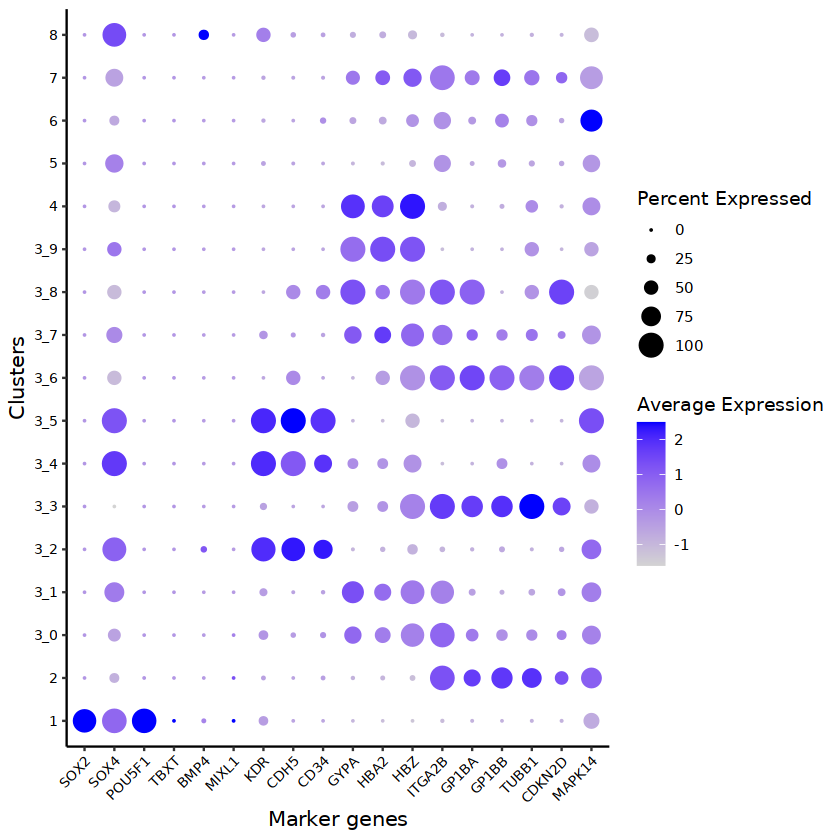

In [115]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_3")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 2

In [116]:
adata<-FindSubCluster(
  adata,
  2,
  'integrated_nn',
  subcluster.name = "Subclusters_2",
  resolution = 0.1,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4936
Number of edges: 36047

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9243
Number of communities: 38
Elapsed time: 0 seconds


33 singletons identified. 5 final clusters.



In [117]:
adata@meta.data$Subclusters_2<-as.factor(adata@meta.data$Subclusters_2)

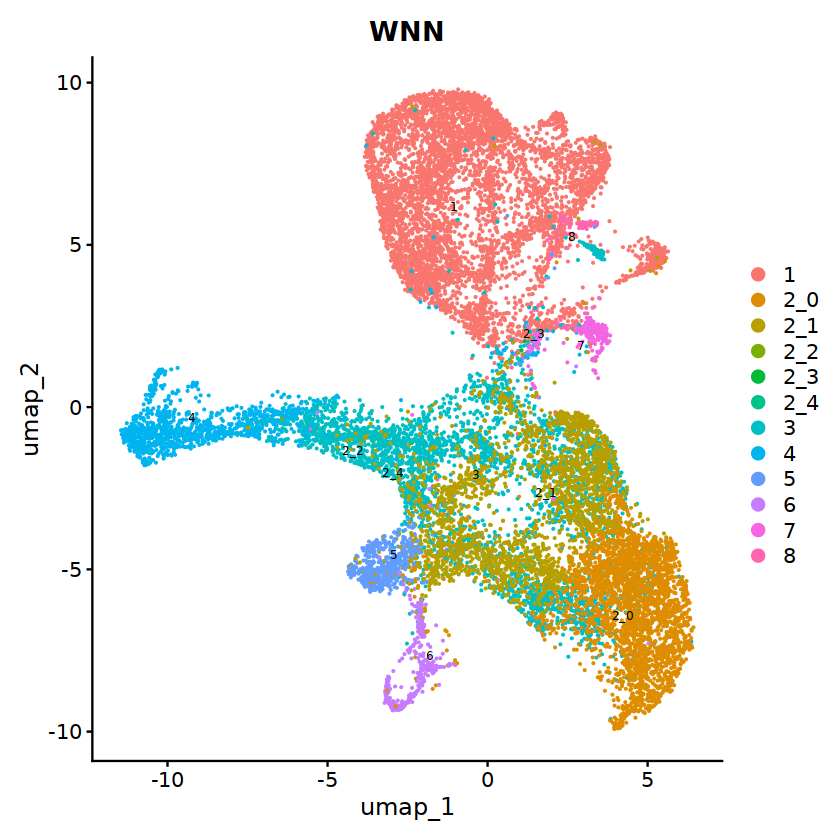

In [118]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "Subclusters_2", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


In [119]:
markers<-c('SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

# DotPlot

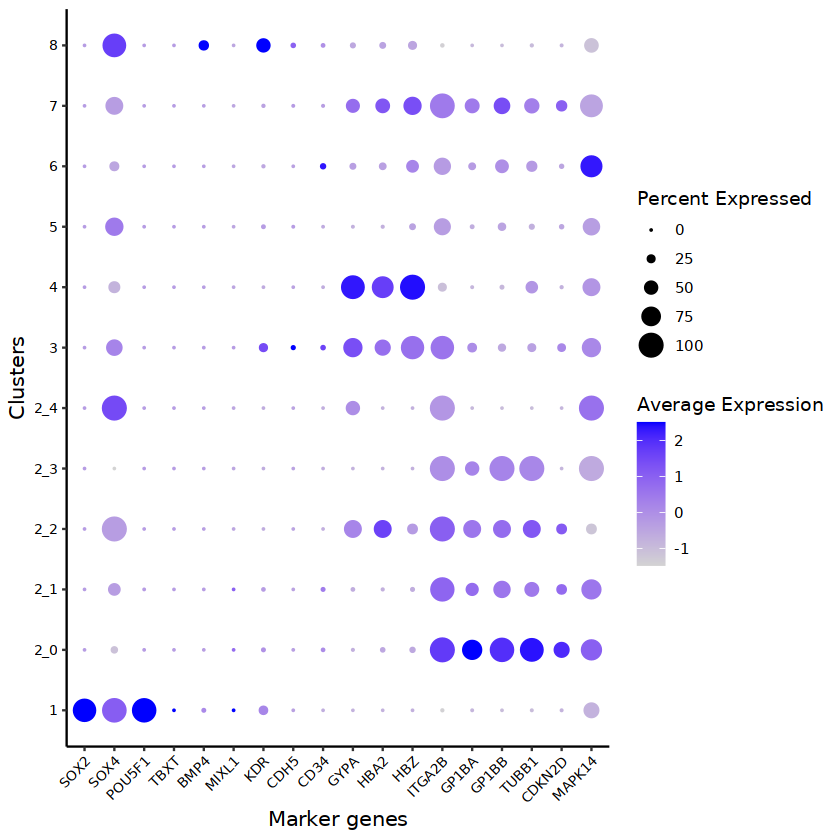

In [120]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_2")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 8

In [121]:
adata<-FindSubCluster(
  adata,
  8,
  'integrated_nn',
  subcluster.name = "Subclusters_8",
  resolution = 0.001,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 80
Number of edges: 308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9990
Number of communities: 4
Elapsed time: 0 seconds


2 singletons identified. 2 final clusters.



In [122]:
adata@meta.data$Subclusters_8<-as.factor(adata@meta.data$Subclusters_8)

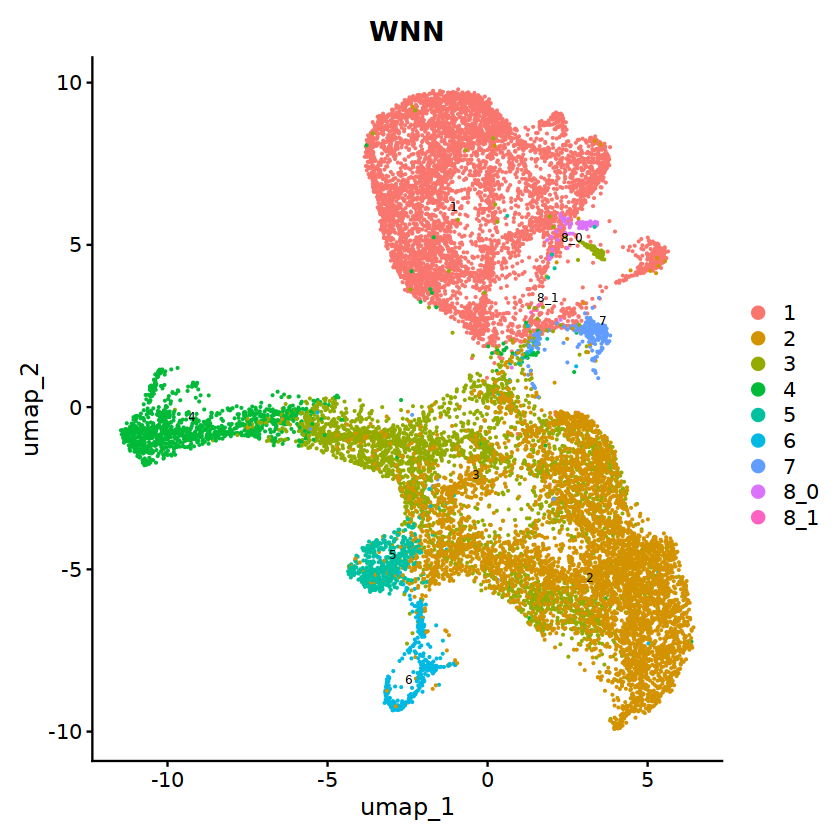

In [123]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "Subclusters_8", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3


In [124]:
markers<-c('SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

# DotPlot

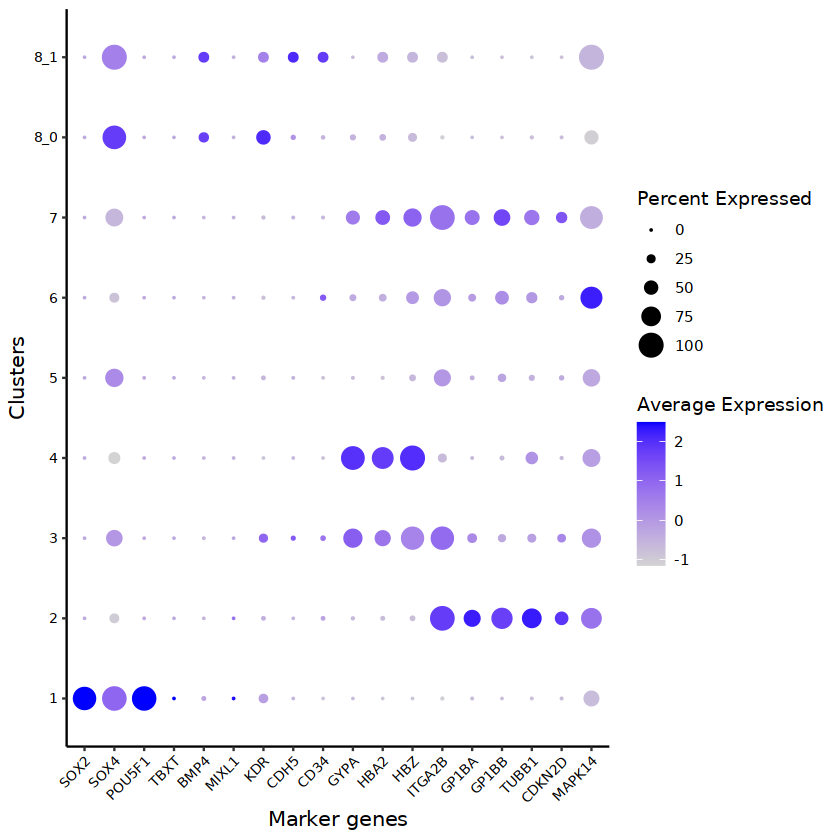

In [125]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_8")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 7

In [131]:
adata<-FindSubCluster(
  adata,
  7,
  'integrated_nn',
  subcluster.name = "Subclusters_7",
  resolution = 2,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 274
Number of edges: 2226

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4439
Number of communities: 17
Elapsed time: 0 seconds


6 singletons identified. 11 final clusters.



In [132]:
adata@meta.data$Subclusters_7<-as.factor(adata@meta.data$Subclusters_7)

# DotPlot

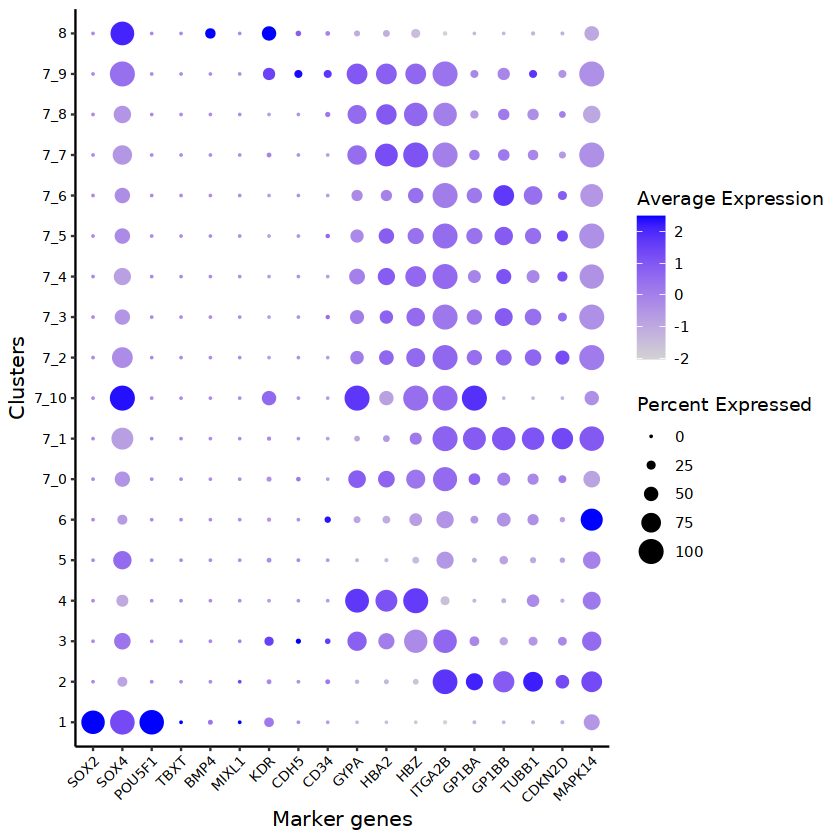

In [582]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_7")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# Subcluster cluster 6

In [142]:
adata<-FindSubCluster(
  adata,
  6,
  'integrated_nn',
  subcluster.name = "Subclusters_6",
  resolution = 0.25,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 392
Number of edges: 3270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8549
Number of communities: 10
Elapsed time: 0 seconds


6 singletons identified. 4 final clusters.



In [143]:
adata@meta.data$Subclusters_6<-as.factor(adata@meta.data$Subclusters_6)

In [144]:
summary(adata@meta.data$Subclusters_6)

1    2    3    4    5  6_0  6_1  6_2  6_3    7    8 
5853 4936 3589 1173  538  177  117   96    2  274   80

In [145]:
markers<-c('SOX2','SOX4','POU5F1',"TBXT",'BMP4','MIXL1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

# DotPlot

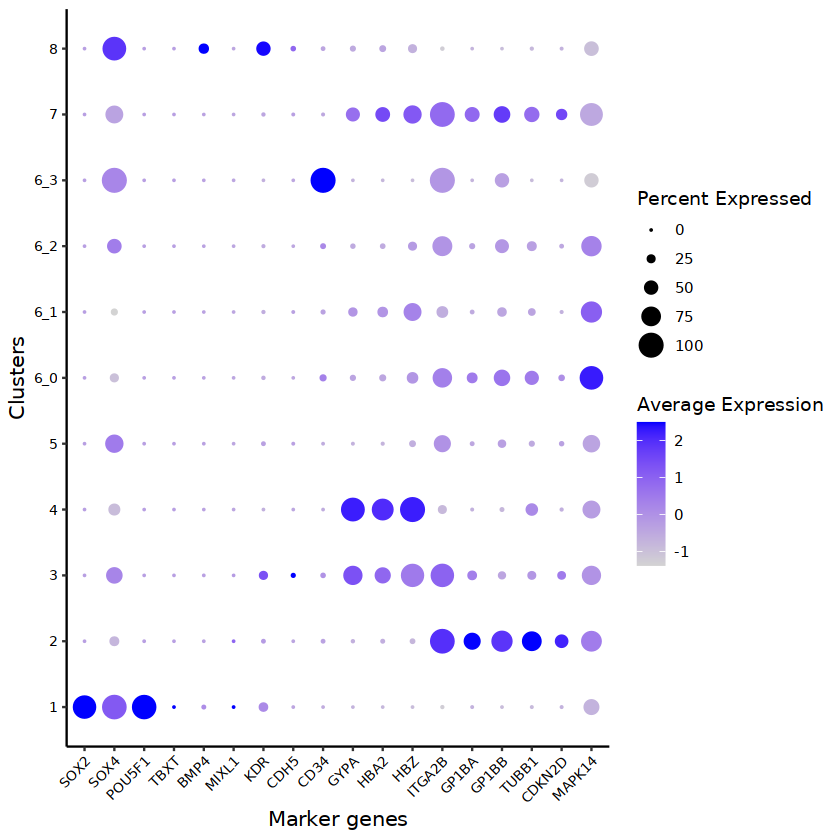

In [146]:
dotplot3<-DotPlot(
  adata,
    features=markers,
  assay = "SCT",
    group.by="Subclusters_6")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

# My own clusters

In [147]:
adata@meta.data$seurat_clusters<-NA

In [148]:
indx<-which(adata@meta.data$seurat_clusters%in%c('1','5','4','5'))

str(indx)

 int [1:7564] 1 2 3 4 5 6 7 8 9 10 ...


In [149]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$seurat_clusters[indx])

In [150]:
indx<-which(adata@meta.data$seurat_clusters%in%c('3'))

str(indx)

 int [1:3589] 5853 5854 5855 5857 5858 5859 5860 5861 5862 5863 ...


In [151]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$Subclusters_3[indx])

In [152]:
summary(adata@meta.data$Subclusters_2)

1  2_0  2_1  2_2  2_3  2_4    3    4    5    6    7    8 
5853 2688 2241    3    2    2 3589 1173  538  392  274   80

In [153]:
indx<-which(adata@meta.data$seurat_clusters%in%c('2'))

str(indx)

 int [1:4936] 6134 6306 6488 6681 6802 6907 7472 7647 7678 7716 ...


In [154]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$Subclusters_2[indx])

In [155]:
indx<-which(adata@meta.data$seurat_clusters%in%c('8'))

str(indx)

 int [1:80] 5856 5868 5872 5873 5878 5879 5880 5890 5891 5894 ...


In [156]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$Subclusters_8[indx])

In [157]:
summary(as.factor(adata@meta.data$seurat_clusters))

1  2_0  2_1  2_2  2_3  2_4  3_0  3_1  3_2  3_3  3_4  3_5  3_6  3_7  3_8  3_9 
5853 2688 2241    3    2    2 1746 1719   76    6    3    2    2   31    2    2 
   4    5  8_0  8_1 NA's 
1173  538   77    3  666

In [158]:
indx<-which(adata@meta.data$seurat_clusters%in%c('7'))

str(indx)

 int [1:274] 5979 6135 6151 6204 6211 6213 6309 6334 6355 6498 ...


In [159]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$Subclusters_7[indx])

In [161]:
indx<-which(adata@meta.data$seurat_clusters%in%c('6'))

str(indx)

 int [1:392] 5959 6100 6163 6171 6201 6209 6221 6254 6259 6271 ...


In [162]:
adata@meta.data$seurat_clusters[indx]<-as.character(adata@meta.data$Subclusters_6[indx])

In [163]:
summary(as.factor(adata@meta.data$seurat_clusters))

1  2_0  2_1  2_2  2_3  2_4  3_0  3_1  3_2  3_3  3_4  3_5  3_6  3_7  3_8  3_9 
5853 2688 2241    3    2    2 1746 1719   76    6    3    2    2   31    2    2 
   4    5  6_0  6_1  6_2  6_3  7_0  7_1 7_10  7_2  7_3  7_4  7_5  7_6  7_7  7_8 
1173  538  177  117   96    2   46   41    2   35   33   30   29   20   19   14 
 7_9  8_0  8_1 
   5   77    3

In [164]:
adata@meta.data$seurat_clusters<-factor(adata@meta.data$seurat_clusters)

## Stacked barplots

### CellTypist_BMA_label_filtered vs seurat_clusters

In [165]:
met<-adata[[]]

In [166]:
#colnames(met)

In [167]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_BMA_label_filtered"))

In [168]:
#str(met.dt)

In [169]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [170]:
met.dt<-data.table(met, key=c("seurat_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [171]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by="seurat_clusters")
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [172]:
str(Freq.table)

'data.frame':	101 obs. of  5 variables:
 $ new_clusters                 : Factor w/ 35 levels "1","2_0","2_1",..: 1 1 1 1 1 2 2 2 3 3 ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 1 172 2 2514 1325 43 ...
 $ TOTAL                        : int  5853 5853 5853 5853 5853 2688 2688 2688 2241 2241 ...
 $ Perc                         : num  50.83 0.31 36.63 12.22 0.02 ...


In [173]:
met.dt<-data.table(met, key=c("CellTypist_BMA_label_filtered"))
Freq.table_BMA<-as.data.frame(met.dt[,.(Freq_CellTypist_BMA_label_filtered=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.table_BMA,
                  by="CellTypist_BMA_label_filtered")

#Freq.table

In [174]:
str(Freq.table)

'data.frame':	101 obs. of  6 variables:
 $ CellTypist_BMA_label_filtered     : chr  "DC3" "DC3" "DC3" "DC3" ...
 $ new_clusters                      : Factor w/ 35 levels "1","2_0","2_1",..: 14 8 7 3 19 22 2 21 9 20 ...
 $ Freq                              : int  1 375 198 43 23 1 2 10 1 37 ...
 $ TOTAL                             : int  31 1719 1746 2241 177 2 2688 96 76 117 ...
 $ Perc                              : num  3.23 21.82 11.34 1.92 12.99 ...
 $ Freq_CellTypist_BMA_label_filtered: int  746 746 746 746 746 746 746 746 746 746 ...


In [175]:
vector_colors_CellTypist_BMA_label_filtered<-c(brewer.pal(9, "Set1"),"white")

-------------------------------------->	0 25 50 75 100


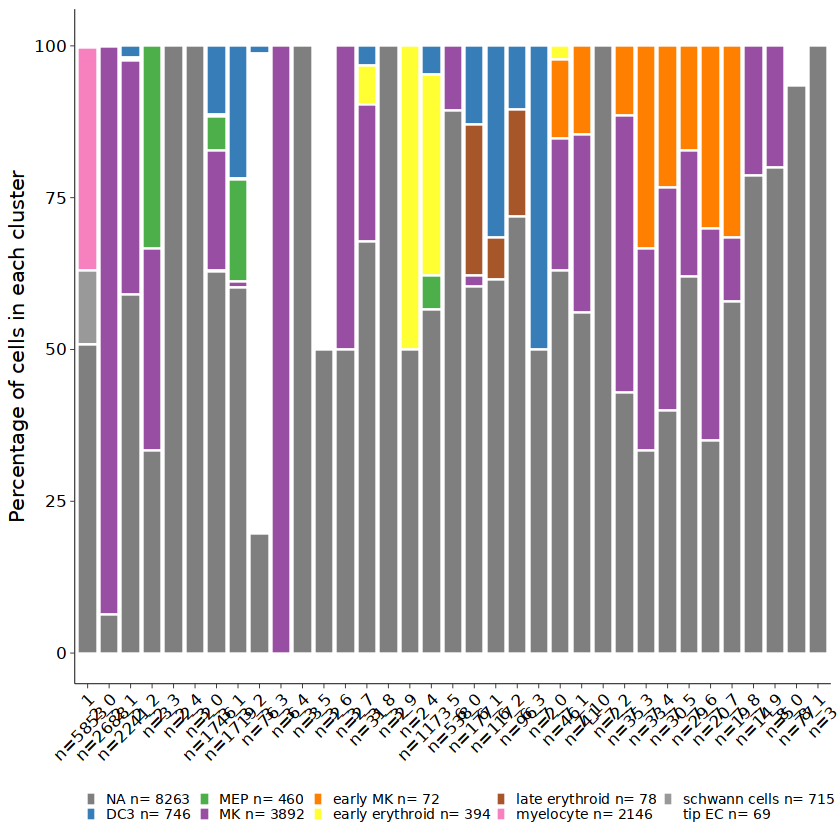

In [176]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table %>%
    mutate(myaxis = paste0(seurat_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_BMA_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_BMA_label_filtered,
                      drop=F,
                      name="My Annotation", breaks=Freq.table_BMA$CellTypist_BMA_label_filtered,
                      labels=paste(Freq.table_BMA$CellTypist_BMA_label_filtered,
                                   Freq.table_BMA$Freq_CellTypist_BMA_label_filtered, sep =' n= '))+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")
  
  



stacked_barplot
  

### CellTypist_IPSCs_label_filtered vs new clusters

In [177]:
met<-adata[[]]

In [178]:
#colnames(met)

In [179]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_IPSCs_label_filtered"))

In [180]:
#str(met.dt)

In [181]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [182]:
met.dt<-data.table(met, key=c("seurat_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [183]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by="seurat_clusters")
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [184]:
str(Freq.table)

'data.frame':	73 obs. of  5 variables:
 $ new_clusters                   : Factor w/ 35 levels "1","2_0","2_1",..: 1 1 1 1 1 2 2 3 3 4 ...
 $ CellTypist_IPSCs_label_filtered: chr  NA "EmergentMesoderm" "NeuralCrest" "PrimitiveStreak" ...
 $ Freq                           : int  818 41 39 2271 2684 2 2686 8 2233 3 ...
 $ TOTAL                          : int  5853 5853 5853 5853 5853 2688 2688 2241 2241 3 ...
 $ Perc                           : num  13.98 0.7 0.67 38.8 45.86 ...


In [185]:
met.dt<-data.table(met, key=c("CellTypist_IPSCs_label_filtered"))
Freq.table_BMA<-as.data.frame(met.dt[,.(Freq_CellTypist_IPSCs_label_filtered=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.table_BMA,
                  by="CellTypist_IPSCs_label_filtered")

#Freq.table

In [186]:
str(Freq.table)

'data.frame':	73 obs. of  6 variables:
 $ CellTypist_IPSCs_label_filtered     : chr  "EmergentMesoderm" "ErythrocyteLineage" "ErythrocyteLineage" "ErythrocyteLineage" ...
 $ new_clusters                        : Factor w/ 35 levels "1","2_0","2_1",..: 1 23 17 26 34 12 9 11 8 33 ...
 $ Freq                                : int  41 1 169 1 3 1 65 1 3 1 ...
 $ TOTAL                               : int  5853 46 1173 35 77 2 76 3 1719 5 ...
 $ Perc                                : num  0.7 2.17 14.41 2.86 3.9 ...
 $ Freq_CellTypist_IPSCs_label_filtered: int  41 171 171 171 79 79 79 79 79 79 ...


In [187]:
vector_colors_CellTypist_IPSCs_label_filtered<-c(brewer.pal(9, "Set1"),"white")

-------------------------------------->	0 25 50 75 100


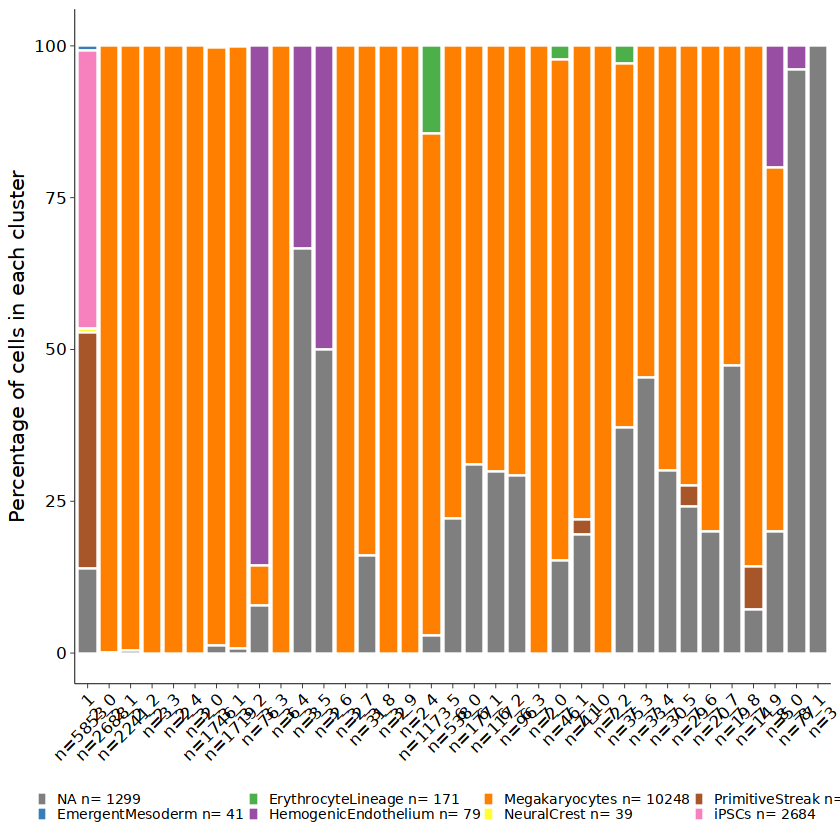

In [188]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table %>%
    mutate(myaxis = paste0(seurat_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_IPSCs_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_IPSCs_label_filtered,
                      drop=F,
                      name="My Annotation", breaks=Freq.table_BMA$CellTypist_IPSCs_label_filtered,
                      labels=paste(Freq.table_BMA$CellTypist_IPSCs_label_filtered,
                                   Freq.table_BMA$Freq_CellTypist_IPSCs_label_filtered, sep =' n= '))+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")
  
  



stacked_barplot
  

# Redo cell annotation

In [253]:
summary(as.factor(adata@meta.data$seurat_clusters))

1  2_0  2_1  2_2  2_3  2_4  3_0  3_1  3_2  3_3  3_4  3_5  3_6  3_7  3_8  3_9 
5853 2688 2241    3    2    2 1746 1719   76    6    3    2    2   31    2    2 
   4    5  6_0  6_1  6_2  6_3  7_0  7_1 7_10  7_2  7_3  7_4  7_5  7_6  7_7  7_8 
1173  538  177  117   96    2   46   41    2   35   33   30   29   20   19   14 
 7_9  8_0  8_1 
   5   77    3

In [254]:
adata@meta.data$rpca_annot<-NA

## cluster 1 is hESCs

In [255]:
indx<-which(adata@meta.data$seurat_clusters == 1)

str(indx)

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [256]:
adata@meta.data$rpca_annot[indx]<-'hESC'

## cluster 2_0, 2_3 and 2_4 is PolyPlo MK

In [257]:
indx<-which(adata@meta.data$seurat_clusters%in%c("2_0","2_3","2_4"))

str(indx)

 int [1:2692] 6306 6681 6802 7647 7678 7716 8070 8189 8200 8266 ...


In [258]:
adata@meta.data$rpca_annot[indx]<-'PolyPlo MK'

## cluster 3_2, 3_4, 3_5 and 8_0 and 8_1 is HemogenicEndothelium

In [259]:
indx<-which(adata@meta.data$seurat_clusters%in%c("3_2","3_4","3_5","8_0","8_1"))

str(indx)

 int [1:161] 5854 5855 5856 5859 5866 5867 5868 5869 5870 5871 ...


In [260]:
adata@meta.data$rpca_annot[indx]<-'HemogenicEndothelium'

## cluster 3_8 is MEP

In [261]:
indx<-which(adata@meta.data$seurat_clusters%in%c("3_8"))

str(indx)

 int [1:2] 6501 9961


In [262]:
adata@meta.data$rpca_annot[indx]<-'MEP'

## cluster 6_1","6_3 are late erythroid

In [263]:
indx<-which(adata@meta.data$seurat_clusters%in%c("6_1","6_3"))

str(indx)

 int [1:119] 6163 6201 6221 6254 6271 6408 6464 6490 6499 6543 ...


In [264]:
adata@meta.data$rpca_annot[indx]<-'late erythroid'

## cluster 6_0 and 6_1 are MEP

In [265]:
indx<-which(adata@meta.data$seurat_clusters%in%c("6_0","6_2"))

str(indx)

 int [1:273] 5959 6100 6171 6209 6259 6305 6420 6684 6751 6805 ...


In [266]:
adata@meta.data$rpca_annot[indx]<-'MEP'

## Majority class of CellTypist_BMA_label_filtered for the rest

In [267]:
indx<-which(is.na(adata@meta.data$rpca_annot))

str(indx)

 int [1:7735] 5853 5857 5858 5860 5861 5862 5863 5864 5865 5875 ...


In [268]:
adata@meta.data$rpca_annot[indx]<-adata@meta.data$CellTypist_BMA_label_filtered[indx]

In [269]:
adata@meta.data$rpca_annot<-factor(adata@meta.data$rpca_annot)

In [270]:
summary(adata@meta.data$rpca_annot)

DC3      early erythroid             early MK 
                 672                  394                   54 
HemogenicEndothelium                 hESC       late erythroid 
                 161                 5853                  128 
                 MEP                   MK            myelocyte 
                 735                 1375                    2 
          PolyPlo MK               tip EC                 NA's 
                2692                    2                 4767

### rpca_annot vs seurat_clusters

In [271]:
met<-adata[[]]

In [272]:
#colnames(met)

In [273]:
met.dt<-data.table(met,key=c("seurat_clusters","rpca_annot"))

In [274]:
#str(met.dt)

In [275]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [276]:
met.dt<-data.table(met, key=c("seurat_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [277]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by="seurat_clusters")
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [278]:
str(Freq.table)

'data.frame':	83 obs. of  5 variables:
 $ new_clusters: Factor w/ 35 levels "1","2_0","2_1",..: 1 2 3 3 3 3 3 3 4 4 ...
 $ rpca_annot  : Factor w/ 11 levels "DC3","early erythroid",..: 5 10 NA 1 3 6 7 8 NA 7 ...
 $ Freq        : int  5853 2688 1325 43 2 1 8 862 1 1 ...
 $ TOTAL       : int  5853 2688 2241 2241 2241 2241 2241 2241 3 3 ...
 $ Perc        : num  100 100 59.13 1.92 0.09 ...


In [279]:
Freq.table_NO_NA<-Freq.table[!is.na(Freq.table$rpca_annot),]

str(Freq.table_NO_NA)

'data.frame':	63 obs. of  5 variables:
 $ new_clusters: Factor w/ 35 levels "1","2_0","2_1",..: 1 2 3 3 3 3 3 4 4 5 ...
 $ rpca_annot  : Factor w/ 11 levels "DC3","early erythroid",..: 5 10 1 3 6 7 8 7 8 10 ...
 $ Freq        : int  5853 2688 43 2 1 8 862 1 1 2 ...
 $ TOTAL       : int  5853 2688 2241 2241 2241 2241 2241 3 3 2 ...
 $ Perc        : num  100 100 1.92 0.09 0.04 ...


In [280]:
Freq.table_NO_NA.dt<-data.table(Freq.table_NO_NA, key=c('seurat_clusters'))

In [281]:
Freq.table_NO_NA_MAX<-as.data.frame(Freq.table_NO_NA.dt[,.SD[which.max(Perc)], by=key(Freq.table_NO_NA.dt)], stringsAsFactors=F)

str(Freq.table_NO_NA_MAX)

'data.frame':	34 obs. of  5 variables:
 $ new_clusters: Factor w/ 35 levels "1","2_0","2_1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ rpca_annot  : Factor w/ 11 levels "DC3","early erythroid",..: 5 10 8 7 10 10 8 1 4 8 ...
 $ Freq        : int  5853 2688 862 1 2 2 346 375 76 6 ...
 $ TOTAL       : int  5853 2688 2241 3 2 2 1746 1719 76 6 ...
 $ Perc        : num  100 100 38.5 33.3 100 ...


In [282]:
indx.1<-which(adata@meta.data$seurat_clusters == Freq.table_NO_NA_MAX$seurat_clusters[1])

str(indx.1)

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [283]:
match<-function(x) {which(adata@meta.data$seurat_clusters == x)}

In [284]:
str(match('1'))

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...


In [285]:
LIST<-lapply(Freq.table_NO_NA_MAX$seurat_clusters, FUN = match)

names(LIST)<-Freq.table_NO_NA_MAX$seurat_clusters

str(LIST)

List of 34
 $ 1  : int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...
 $ 2_0: int [1:2688] 6306 6681 6802 7647 7678 7716 8070 8189 8200 8266 ...
 $ 2_1: int [1:2241] 6134 6488 6907 7472 7941 8055 10156 11017 11019 11021 ...
 $ 2_2: int [1:3] 12034 14208 15835
 $ 2_3: int [1:2] 13318 14051
 $ 2_4: int [1:2] 15032 16230
 $ 3_0: int [1:1746] 5853 5857 5860 5861 5864 5865 5875 5876 5877 5881 ...
 $ 3_1: int [1:1719] 5858 5862 5863 5885 5911 5929 5938 5968 5969 5972 ...
 $ 3_2: int [1:76] 5854 5855 5859 5866 5867 5869 5870 5874 5882 5883 ...
 $ 3_3: int [1:6] 6680 7455 7975 8341 10188 10287
 $ 3_4: int [1:3] 6010 6027 6096
 $ 3_5: int [1:2] 5871 5940
 $ 3_6: int [1:2] 7263 8838
 $ 3_7: int [1:31] 5903 5946 6062 6068 6179 6419 6731 7137 7160 7169 ...
 $ 3_8: int [1:2] 6501 9961
 $ 3_9: int [1:2] 10070 10788
 $ 4  : int [1:1173] 6017 6045 6115 6120 6121 6122 6127 6128 6133 6147 ...
 $ 5  : int [1:538] 6112 6245 6278 6329 6386 6465 6622 6750 6796 6801 ...
 $ 6_0: int [1:177] 5959 6100 6171 6259 6305 6751 6

In [286]:
array<-names(LIST)

adata@meta.data$Integrated_annotation<-NA

for(i in 1:length(array)){

    cluster<-array[i]

    indx<-LIST[[cluster]]

    str(indx)

    rpca_annot_sel<-as.character((Freq.table_NO_NA_MAX$rpca_annot[which(Freq.table_NO_NA_MAX$seurat_clusters == cluster)]))

    str(rpca_annot_sel)

    adata@meta.data$Integrated_annotation[indx]<-rpca_annot_sel
    
    
}

 int [1:5853] 1 2 3 4 5 6 7 8 9 10 ...
 chr "hESC"
 int [1:2688] 6306 6681 6802 7647 7678 7716 8070 8189 8200 8266 ...
 chr "PolyPlo MK"
 int [1:2241] 6134 6488 6907 7472 7941 8055 10156 11017 11019 11021 ...
 chr "MK"
 int [1:3] 12034 14208 15835
 chr "MEP"
 int [1:2] 13318 14051
 chr "PolyPlo MK"
 int [1:2] 15032 16230
 chr "PolyPlo MK"
 int [1:1746] 5853 5857 5860 5861 5864 5865 5875 5876 5877 5881 ...
 chr "MK"
 int [1:1719] 5858 5862 5863 5885 5911 5929 5938 5968 5969 5972 ...
 chr "DC3"
 int [1:76] 5854 5855 5859 5866 5867 5869 5870 5874 5882 5883 ...
 chr "HemogenicEndothelium"
 int [1:6] 6680 7455 7975 8341 10188 10287
 chr "MK"
 int [1:3] 6010 6027 6096
 chr "HemogenicEndothelium"
 int [1:2] 5871 5940
 chr "HemogenicEndothelium"
 int [1:2] 7263 8838
 chr "MK"
 int [1:31] 5903 5946 6062 6068 6179 6419 6731 7137 7160 7169 ...
 chr "MK"
 int [1:2] 6501 9961
 chr "MEP"
 int [1:2] 10070 10788
 chr "early erythroid"
 int [1:1173] 6017 6045 6115 6120 6121 6122 6127 6128 6133 6147 ...

In [287]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)

In [288]:
summary(adata@meta.data$Integrated_annotation)

DC3      early erythroid             early MK 
                1719                 1175                   52 
HemogenicEndothelium                 hESC       late erythroid 
                 161                 5853                  119 
                 MEP                   MK           PolyPlo MK 
                 278                 4784                 2692 
                NA's 
                   2

## solve NA in Integrated_annotation

In [289]:
sum(is.na(adata@meta.data$Integrated_annotation))

[1] 2

In [290]:
adata@meta.data$seurat_clusters[is.na(adata@meta.data$Integrated_annotation)]

[1] 7_10 7_10
35 Levels: 1 2_0 2_1 2_2 2_3 2_4 3_0 3_1 3_2 3_3 3_4 3_5 3_6 3_7 3_8 3_9 ... 8_1

In [291]:
adata@meta.data$Integrated_annotation[is.na(adata@meta.data$Integrated_annotation)]<-'early MK'

In [292]:
adata@meta.data$seurat_clusters[is.na(adata@meta.data$Integrated_annotation)]

factor()
35 Levels: 1 2_0 2_1 2_2 2_3 2_4 3_0 3_1 3_2 3_3 3_4 3_5 3_6 3_7 3_8 3_9 ... 8_1

# DotPlot on Integrated_annotation

In [293]:
adata

An object of class Seurat 
751343 features across 16835 samples within 6 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 2 dimensional reductions calculated: pca, umap

In [294]:
genes<-Features(adata[['SCT']])

str(genes)

 chr [1:27889] "AL627309.1" "AL627309.5" "AL627309.4" "AL669831.2" ...


In [295]:
indx<-grep("^RUNX1", genes)

str(indx)

 int [1:2] 11182 24267


In [296]:
# https://www.ahajournals.org/doi/full/10.1161/CIRCRESAHA.121.319821

select<-genes[indx]

select

[1] "RUNX1T1" "RUNX1"

Warning message:
“The following requested variables were not found: RUNX1C”


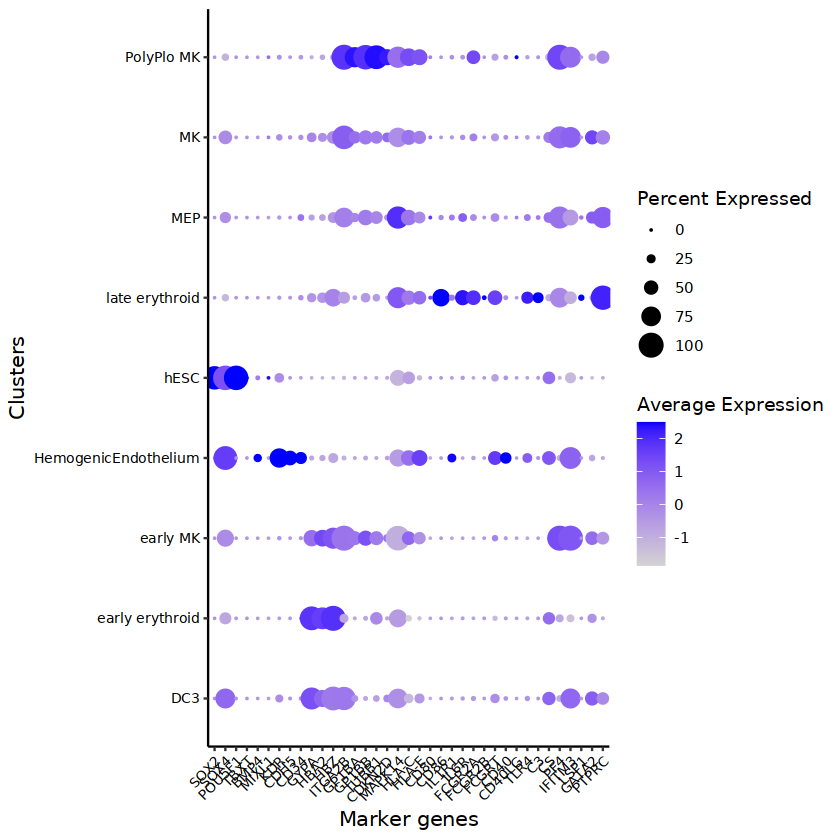

In [297]:
dotplot3<-DotPlot(
  adata,
    features=c(markers,'HLA-C','HLA-E','CD80','CD86','IL1R1','IL6R','FCGR2A','FCGR2B','FCGRT',
               'CD40','CD40LG','TLR4','C3','CS','PF4','IFITM3','LSP1','RUNX1C','GATA2','PTPRC'),
  assay = "SCT",
    group.by="Integrated_annotation")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

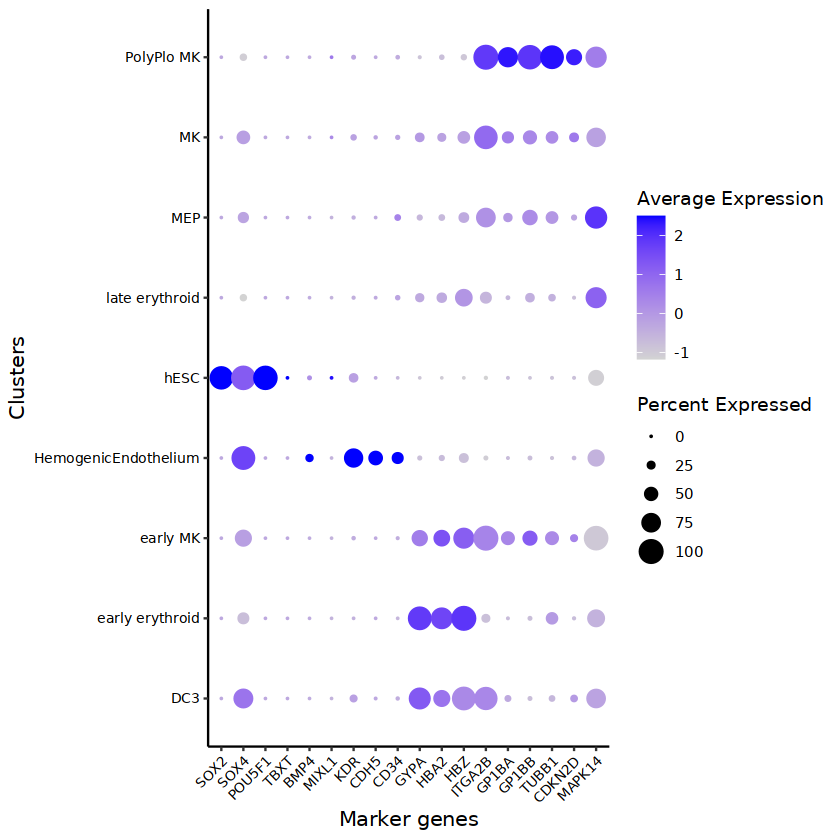

In [298]:
dotplot3<-DotPlot(
  adata,
    features=c(markers),
  assay = "SCT",
    group.by="Integrated_annotation")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(color="black", family="sans", size=12),
          axis.title.x=element_text(color="black", family="sans", size=12),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

## new path_graphs

In [299]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"


In [300]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

In [301]:
setwd(path_graphs)

svgname<-paste("Dotplot_marker_genes_by_Integrated_annotation",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png", width =13, height = 13)
}

# DC3 is not real revert to MEP

In [302]:
adata@meta.data$Integrated_annotation<-revalue(adata@meta.data$Integrated_annotation, c('DC3' = 'MEP'))

In [303]:
summary(adata@meta.data$Integrated_annotation)

MEP      early erythroid             early MK 
                1997                 1175                   54 
HemogenicEndothelium                 hESC       late erythroid 
                 161                 5853                  119 
                  MK           PolyPlo MK 
                4784                 2692

In [304]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation,
                                                        levels=c('hESC','HemogenicEndothelium','MEP','early erythroid','late erythroid','early MK','MK','PolyPlo MK'), ordered=T)

summary(adata@meta.data$Integrated_annotation)

hESC HemogenicEndothelium                  MEP 
                5853                  161                 1997 
     early erythroid       late erythroid             early MK 
                1175                  119                   54 
                  MK           PolyPlo MK 
                4784                 2692

In [305]:
adata@meta.data$time_point<-factor(adata@meta.data$time_point,
                                                        levels=c('Day_0','Day_8','Day_12','Day_15'), ordered=T)

summary(adata@meta.data$time_point)

Day_0  Day_8 Day_12 Day_15 
  5852    259   4905   5819

# Final graphs

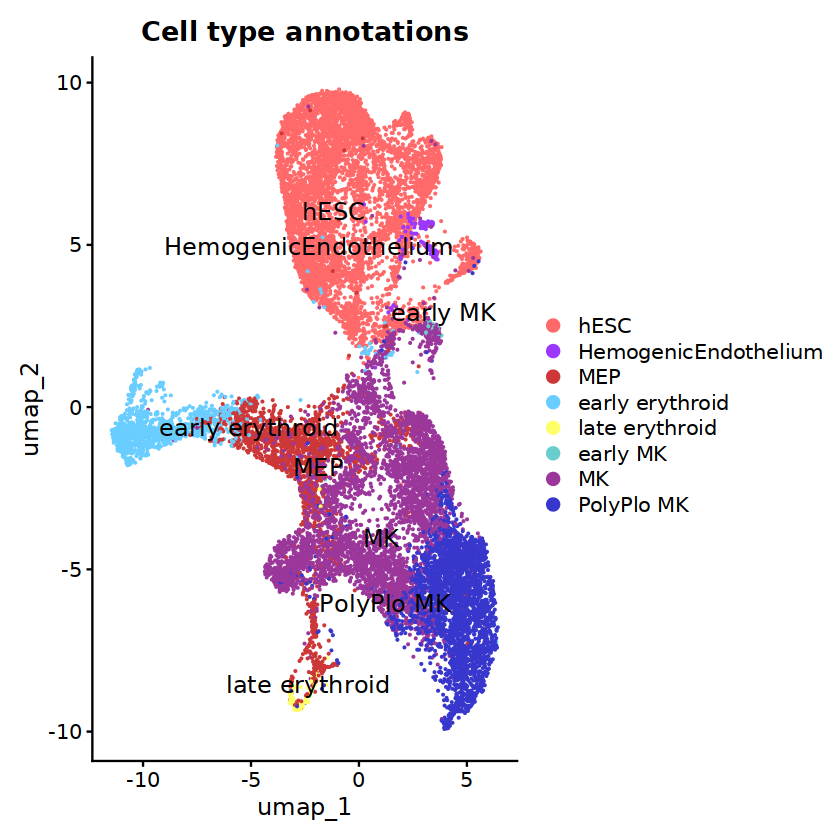

In [306]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "Integrated_annotation", cols=DiscretePalette(8,palette="parade"),
              label = TRUE, label.size = 5, repel = TRUE) + ggtitle("Cell type annotations")
p3

In [307]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

svgname<-paste("UMAP_Integrated_annotation",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

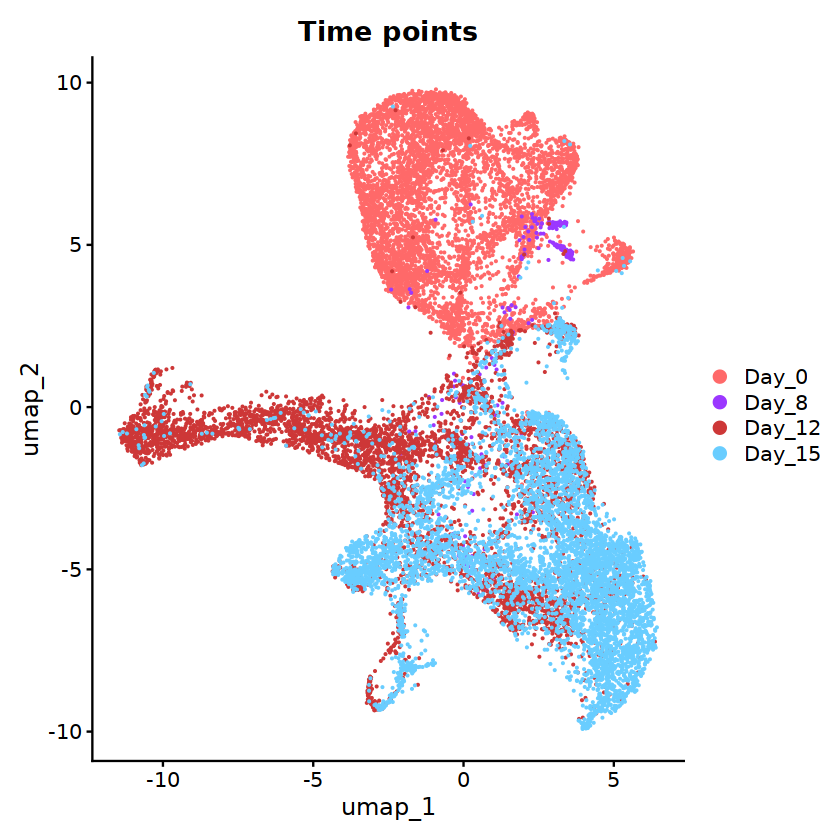

In [308]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "time_point", cols=DiscretePalette(8,palette="parade"),
              label = FALSE, label.size = 5, repel = TRUE) + ggtitle("Time points")
p3

In [309]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

svgname<-paste("UMAP_rpca_time_point",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= p3,
         device="png", height=7, width=9)
}

# New clone line and genotype levels

In [310]:
colnames(adata@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

In [311]:
adata@meta.data$Assigned_GFPbc_integral<-factor(adata@meta.data$Assigned_GFPbc_integral)

summary(adata@meta.data$Assigned_GFPbc_integral)

chrGFP_R882H1    chrGFP_R882H2    chrGFP_R882H3 chrGFP_rs_R882H1 
            1101              123             2355             1381 
chrGFP_rs_R882H2 chrGFP_rs_R882H3       chrGFP_rs1       chrGFP_rs2 
             706              864              872              776 
      chrGFP_rs3       chrGFP_WTA       chrGFP_WTB       chrGFP_WTC 
            7996              130              226              305

In [312]:
adata@meta.data$Assigned_GFPgenotype_integral<-factor(adata@meta.data$Assigned_GFPgenotype_integral)

summary(adata@meta.data$Assigned_GFPgenotype_integral)

CHEK2 T/T   DNMT3A R882H Double mutants             wt 
          9644           3579           2951            661

In [313]:
adata@meta.data$clone_line<-adata@meta.data$Assigned_GFPbc_integral

In [314]:
adata@meta.data$clone_line<-revalue(adata@meta.data$clone_line,
                                   c('chrGFP_WTA' = 'wt_1',
                                    'chrGFP_WTB' = 'wt_2',
                                     'chrGFP_WTC' = 'wt_3',
                                    'chrGFP_rs1' = 'rs62237617_1',
                                     'chrGFP_rs2' = 'rs62237617_2',
                                     'chrGFP_rs3' = 'rs62237617_3',
                                     'chrGFP_R882H1' = 'DNMT3A_1',
                                     'chrGFP_R882H2' = 'DNMT3A_2',
                                     'chrGFP_R882H3' = 'DNMT3A_3',
                                     'chrGFP_rs_R882H1' = 'rs62237617_DNMT3A_1',
                                     'chrGFP_rs_R882H2' = 'rs62237617_DNMT3A_2',
                                     'chrGFP_rs_R882H3' = 'rs62237617_DNMT3A_3') 
                                   )

In [315]:
adata@meta.data$clone_line<-factor(adata@meta.data$clone_line,
                                  levels=c('wt_1','wt_2','wt_3','rs62237617_1','rs62237617_2','rs62237617_3',
                                           'DNMT3A_1','DNMT3A_2','DNMT3A_3',
                                          'rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'),
                                  ordered=T)

In [316]:
summary(adata@meta.data$clone_line)

wt_1                wt_2                wt_3        rs62237617_1 
                130                 226                 305                 872 
       rs62237617_2        rs62237617_3            DNMT3A_1            DNMT3A_2 
                776                7996                1101                 123 
           DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3 
               2355                1381                 706                 864

In [317]:
summary(adata@meta.data$Assigned_GFPbc_integral)

chrGFP_R882H1    chrGFP_R882H2    chrGFP_R882H3 chrGFP_rs_R882H1 
            1101              123             2355             1381 
chrGFP_rs_R882H2 chrGFP_rs_R882H3       chrGFP_rs1       chrGFP_rs2 
             706              864              872              776 
      chrGFP_rs3       chrGFP_WTA       chrGFP_WTB       chrGFP_WTC 
            7996              130              226              305

In [318]:
summary(adata@meta.data$Assigned_GFPgenotype_integral)

CHEK2 T/T   DNMT3A R882H Double mutants             wt 
          9644           3579           2951            661

In [319]:
adata@meta.data$Genotype<-adata@meta.data$Assigned_GFPgenotype_integral

In [320]:
adata@meta.data$Genotype<-revalue(adata@meta.data$Genotype,
                                   c('wt' = 'wt',
                                    'CHEK2 T/T' = 'rs62237617',
                                     'DNMT3A R882H' = 'DNMT3A',
                                    'Double mutants' = 'rs62237617_DNMT3A') 
                                   )

In [321]:
adata@meta.data$Genotype<-factor(adata@meta.data$Genotype,
                                  levels=c('wt','rs62237617','DNMT3A',
                                          'rs62237617_DNMT3A'),
                                  ordered=T)

In [322]:
summary(adata@meta.data$Genotype)

wt        rs62237617            DNMT3A rs62237617_DNMT3A 
              661              9644              3579              2951

# Show the genotype breakdown

## Freq tables clone_line vs time_point vs Integrated_annotation

In [323]:
met<-adata[[]]

In [324]:
met.dt<-data.table(met,key=c("time_point","Integrated_annotation","clone_line"))

In [325]:
#str(met.dt)

In [326]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [327]:
met.dt<-data.table(met, key=c("time_point","Integrated_annotation"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [328]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Integrated_annotation"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [329]:
str(Freq.table)

'data.frame':	151 obs. of  6 variables:
 $ time_point              : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ rpca_annot_majority_vote: Ord.factor w/ 8 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line              : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                    : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                   : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                    : num  1.03 2.26 1.37 2.22 2.03 ...


In [330]:
met.dt<-data.table(met, key=c("time_point"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by="time_point")

#Freq.table

In [331]:
str(Freq.table)

'data.frame':	151 obs. of  7 variables:
 $ time_point              : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ rpca_annot_majority_vote: Ord.factor w/ 8 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line              : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                    : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                   : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                    : num  1.03 2.26 1.37 2.22 2.03 ...
 $ ntime                   : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...


In [332]:
Freq.TOTAL<-merge(Freq.TOTAL,
                  Freq.time_point,
                  by="time_point")

In [333]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]

str(Freq.table_filtered)

'data.frame':	145 obs. of  7 variables:
 $ time_point              : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ rpca_annot_majority_vote: Ord.factor w/ 8 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line              : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq                    : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ TOTAL                   : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...
 $ Perc                    : num  1.03 2.26 1.37 2.22 2.03 ...
 $ ntime                   : int  5852 5852 5852 5852 5852 5852 5852 5852 5852 5852 ...


In [334]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

-------------------------------------->	0 25 50 75 100


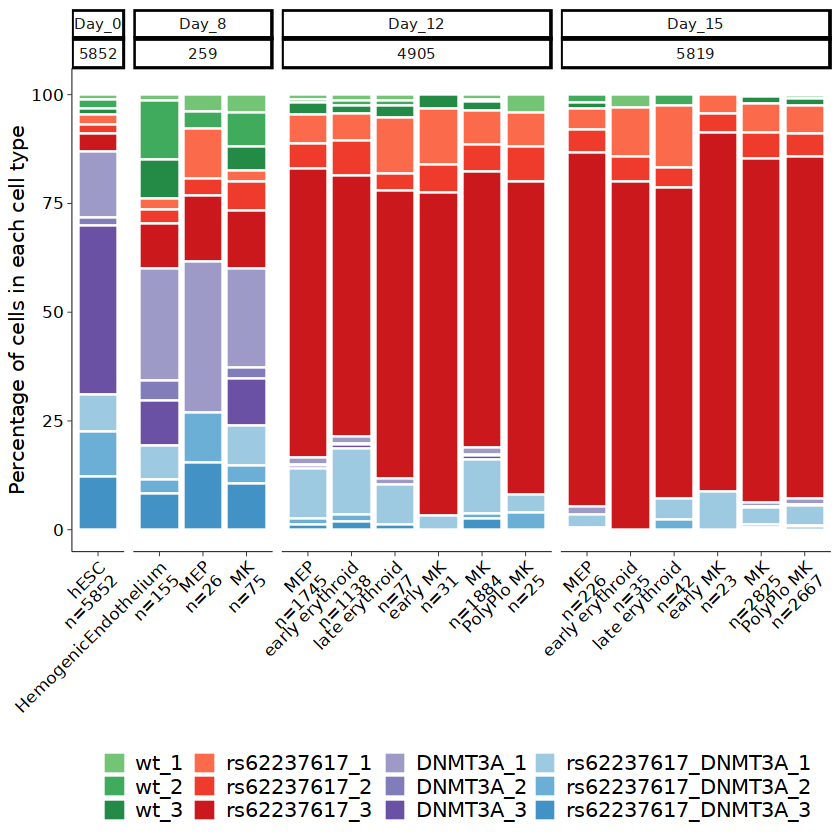

In [335]:
#### Stacked Graph #2---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Integrated_annotation, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Integrated_annotation)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="My Annotation")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ time_point+ntime, scales='free_x', space='free_x', switch="y", labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime)))+   
    scale_x_discrete(name="Seurat clusters", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [336]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

svgname<-paste("stacked_barplot_time_point_Integrated_annotation_vs_clone_line",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=12, height=8)
}

# line plot referred to genotype wt

In [337]:
met<-adata[[]]

In [338]:
met.dt<-data.table(met,key=c("time_point","clone_line","Genotype"))

In [339]:
#str(met.dt)

In [340]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
str(Freq.table)

'data.frame':	48 obs. of  4 variables:
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Freq      : int  60 132 80 130 119 242 893 98 2277 506 ...


## normalize by number of cell counts at time 0

In [341]:
time_0<-Freq.table[which(Freq.table$time_point == 'Day_0'),]

str(time_0)
cat("\n")


time_0_sub<-time_0[,which(colnames(time_0)%in%c('clone_line','Freq'))]


colnames(time_0_sub)[which(colnames(time_0_sub) == 'Freq')]<-'cells_at_day_0'


str(time_0_sub)
cat("\n")


'data.frame':	12 obs. of  4 variables:
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Freq      : int  60 132 80 130 119 242 893 98 2277 506 ...

'data.frame':	12 obs. of  2 variables:
 $ clone_line    : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ cells_at_day_0: int  60 132 80 130 119 242 893 98 2277 506 ...



In [342]:
Freq.table<-merge(Freq.table,
                 time_0_sub,
                 by=c('clone_line'))

str(Freq.table)

'data.frame':	48 obs. of  5 variables:
 $ clone_line    : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 7 7 8 8 8 8 9 9 ...
 $ time_point    : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Genotype      : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Freq          : int  893 68 77 63 98 9 13 3 2277 24 ...
 $ cells_at_day_0: int  893 893 893 893 98 98 98 98 2277 2277 ...


In [343]:
Freq.table$cells_relative_to_time_0<-Freq.table$Freq/Freq.table$cells_at_day_0

str(Freq.table)

'data.frame':	48 obs. of  6 variables:
 $ clone_line              : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 7 7 8 8 8 8 9 9 ...
 $ time_point              : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Genotype                : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Freq                    : int  893 68 77 63 98 9 13 3 2277 24 ...
 $ cells_at_day_0          : int  893 893 893 893 98 98 98 98 2277 2277 ...
 $ cells_relative_to_time_0: num  1 0.0761 0.0862 0.0705 1 ...


## calculate mean and sd

In [344]:
Freq.table.dt<-data.table(Freq.table,
                                           key=c('Genotype','time_point'))
      
      
      
      Mean_counts_relative<-as.data.frame(Freq.table.dt[,.(cells_relative_to_time_0=mean(cells_relative_to_time_0),
                                                                 sd=sd(cells_relative_to_time_0)), by=key(Freq.table.dt)], stringsAsFactors=F)
      
      Mean_counts_relative$cells_relative_to_time_0_max<-Mean_counts_relative$cells_relative_to_time_0+Mean_counts_relative$sd
      Mean_counts_relative$cells_relative_to_time_0_min<-Mean_counts_relative$cells_relative_to_time_0-Mean_counts_relative$sd


str(Mean_counts_relative)
cat("\n")

'data.frame':	16 obs. of  6 variables:
 $ Genotype                    : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 1 2 2 2 2 3 3 ...
 $ time_point                  : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ cells_relative_to_time_0    : num  1 0.182 0.876 0.506 1 ...
 $ sd                          : num  0 0.0707 0.5865 0.5839 0 ...
 $ cells_relative_to_time_0_max: num  1 0.252 1.463 1.09 1 ...
 $ cells_relative_to_time_0_min: num  1 0.1109 0.2899 -0.0781 1 ...



## line plot 1

In [345]:
vector_fill<-c(brewer.pal(9, "Greens")[c(6)],brewer.pal(9, "Reds")[c(6)],brewer.pal(9, "Purples")[c(6)],brewer.pal(9, "Blues")[c(5)])

vector_fill

[1] "#41AB5D" "#EF3B2C" "#807DBA" "#6BAED6"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


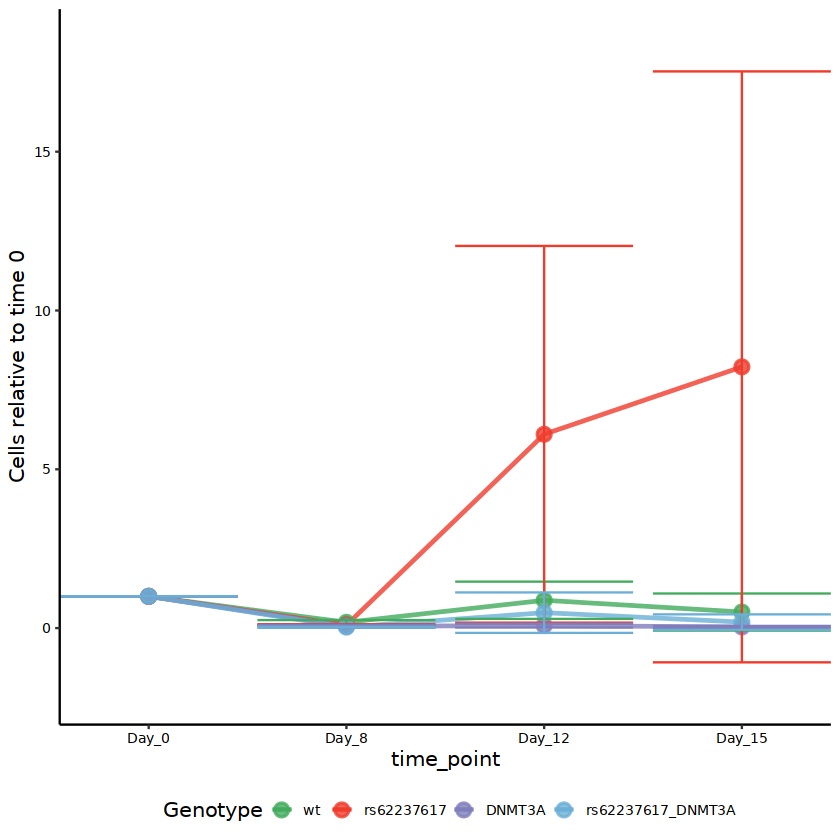

In [346]:
graph_Mean_counts_relative<-ggplot(data=Mean_counts_relative,
                                aes(x=time_point,
                                    y=cells_relative_to_time_0))+          
        geom_line(aes(group=Genotype, 
                      color=Genotype), 
                  size=1, alpha=0.8)+
        scale_color_manual(values=vector_fill, drop=F)+      
        geom_point(aes(fill=Genotype, color=Genotype),
                   size=3, shape=21, stroke=1, alpha=0.8)+
        geom_errorbar(aes(ymin=cells_relative_to_time_0_min, ymax=cells_relative_to_time_0_max,
                                        group=Genotype, 
                                        color=Genotype))+
        scale_color_manual(values=vector_fill, drop=F)+
        scale_fill_manual(values=vector_fill, drop=F)+
        scale_x_discrete(name="time_point", expand = c(0.1, 0.1))+     
        scale_y_continuous(name="Cells relative to time 0", expand = c(0.1, 0.1))+
         theme_classic()+
              theme(axis.title=element_blank(),
                    axis.title.y=element_text(size=12,color="black", family="sans"),
                    axis.title.x=element_text(size=12,color="black", family="sans"),
                    axis.text.y=element_text(size=8,color="black", family="sans"),
                    axis.text.x=element_text(size=8,color="black", family="sans"))+
              theme(legend.title = element_text(size=12),
                    legend.text = element_text(size=8),
                    legend.key.size = unit(0.5, 'cm'), #change legend key size
                    legend.key.height = unit(0.5, 'cm'), #change legend key height
                    legend.key.width = unit(0.5, 'cm'), #change legend key width
                    legend.position="bottom")+
              guides(fill=guide_legend(nrow=2,byrow=TRUE))


graph_Mean_counts_relative





In [347]:
Mean_counts_relative

Genotype          time_point cells_relative_to_time_0 sd        
1  wt                Day_0      1.00000000               0.00000000
2  wt                Day_8      0.18156566               0.07068768
3  wt                Day_12     0.87638889               0.58648454
4  wt                Day_15     0.50580808               0.58389600
5  rs62237617        Day_0      1.00000000               0.00000000
6  rs62237617        Day_8      0.09521156               0.02747337
7  rs62237617        Day_12     6.10266952               5.93032030
8  rs62237617        Day_15     8.22545992               9.30300977
9  DNMT3A            Day_0      1.00000000               0.00000000
10 DNMT3A            Day_8      0.05950825               0.04312701
11 DNMT3A            Day_12     0.07808346               0.05906346
12 DNMT3A            Day_15     0.03650176               0.03151764
13 rs62237617_DNMT3A Day_0      1.00000000               0.00000000
14 rs62237617_DNMT3A Day_8      0.03028259               0.01042873
15 rs62237617_DNMT3A Day_12     0.48611618               0.63680706
16 rs62237617_DNMT3A Day_15     0.18837033               0.24422060
   cells_relative_to_time_0_max cells_relative_to_time_0_min
1   1.00000000                   1.000000000                
2   0.25225333                   0.110877979                
3   1.46287343                   0.289904345                
4   1.08970408                  -0.078087916                
5   1.00000000                   1.000000000                
6   0.12268493                   0.067738195                
7  12.03298982                   0.172349224                
8  17.52846969                  -1.077549844                
9   1.00000000                   1.000000000                
10  0.10263525                   0.016381238                
11  0.13714692                   0.019019992                
12  0.06801940                   0.004984117                
13  1.00000000                   1.000000000                
14  0.04071132                   0.019853866                
15  1.12292324                  -0.150690881                
16  0.43259093                  -0.055850279

In [348]:
Freq.table

clone_line          time_point Genotype          Freq cells_at_day_0
1  DNMT3A_1            Day_0      DNMT3A             893  893          
2  DNMT3A_1            Day_8      DNMT3A              68  893          
3  DNMT3A_1            Day_12     DNMT3A              77  893          
4  DNMT3A_1            Day_15     DNMT3A              63  893          
5  DNMT3A_2            Day_0      DNMT3A              98   98          
6  DNMT3A_2            Day_8      DNMT3A               9   98          
7  DNMT3A_2            Day_12     DNMT3A              13   98          
8  DNMT3A_2            Day_15     DNMT3A               3   98          
9  DNMT3A_3            Day_0      DNMT3A            2277 2277          
10 DNMT3A_3            Day_8      DNMT3A              24 2277          
11 DNMT3A_3            Day_12     DNMT3A              35 2277          
12 DNMT3A_3            Day_15     DNMT3A              19 2277          
13 rs62237617_1        Day_0      rs62237617         130  130          
14 rs62237617_1        Day_8      rs62237617           9  130          
15 rs62237617_1        Day_12     rs62237617         348  130          
16 rs62237617_1        Day_15     rs62237617         385  130          
17 rs62237617_2        Day_0      rs62237617         119  119          
18 rs62237617_2        Day_8      rs62237617          11  119          
19 rs62237617_2        Day_12     rs62237617         319  119          
20 rs62237617_2        Day_15     rs62237617         327  119          
21 rs62237617_3        Day_0      rs62237617         242  242          
22 rs62237617_3        Day_8      rs62237617          30  242          
23 rs62237617_3        Day_12     rs62237617        3134  242          
24 rs62237617_3        Day_15     rs62237617        4590  242          
25 rs62237617_DNMT3A_1 Day_0      rs62237617_DNMT3A  506  506          
26 rs62237617_DNMT3A_1 Day_8      rs62237617_DNMT3A   19  506          
27 rs62237617_DNMT3A_1 Day_12     rs62237617_DNMT3A  618  506          
28 rs62237617_DNMT3A_1 Day_15     rs62237617_DNMT3A  238  506          
29 rs62237617_DNMT3A_2 Day_8      rs62237617_DNMT3A   11  600          
30 rs62237617_DNMT3A_2 Day_0      rs62237617_DNMT3A  600  600          
31 rs62237617_DNMT3A_2 Day_12     rs62237617_DNMT3A   65  600          
32 rs62237617_DNMT3A_2 Day_15     rs62237617_DNMT3A   30  600          
33 rs62237617_DNMT3A_3 Day_12     rs62237617_DNMT3A   92  715          
34 rs62237617_DNMT3A_3 Day_8      rs62237617_DNMT3A   25  715          
35 rs62237617_DNMT3A_3 Day_0      rs62237617_DNMT3A  715  715          
36 rs62237617_DNMT3A_3 Day_15     rs62237617_DNMT3A   32  715          
37 wt_1                Day_0      wt                  60   60          
38 wt_1                Day_15     wt                   6   60          
39 wt_1                Day_12     wt                  58   60          
40 wt_1                Day_8      wt                   6   60          
41 wt_2                Day_0      wt                 132  132          
42 wt_2                Day_8      wt                  29  132          
43 wt_2                Day_15     wt                  32  132          
44 wt_2                Day_12     wt                  33  132          
45 wt_3                Day_0      wt                  80   80          
46 wt_3                Day_8      wt                  18   80          
47 wt_3                Day_12     wt                 113   80          
48 wt_3                Day_15     wt                  94   80          
   cells_relative_to_time_0
1   1.000000000            
2   0.076147816            
3   0.086226204            
4   0.070548712            
5   1.000000000            
6   0.091836735            
7   0.132653061            
8   0.030612245            
9   1.000000000            
10  0.010540184            
11  0.015371102            
12  0.008344313            
13  1.000000000            
14  0.069230769            
15  2.676923077            
16  2.961538462            

In [349]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


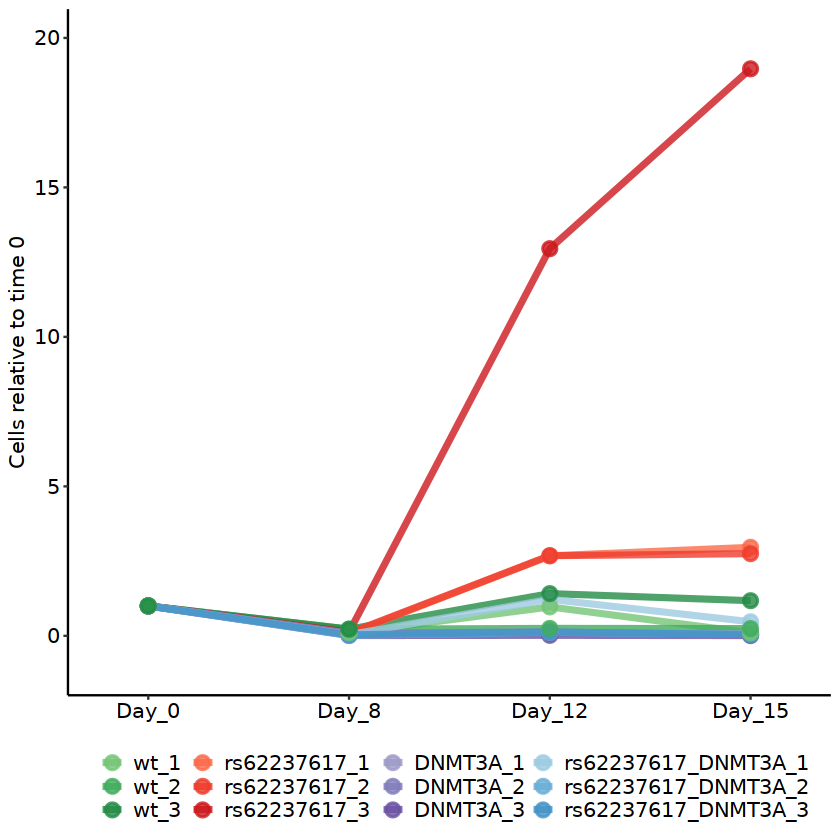

In [350]:
graph_Freq.table<-ggplot(data=Freq.table,
                                aes(x=time_point,
                                    y=cells_relative_to_time_0))+          
        geom_line(aes(group=clone_line, 
                      color=clone_line), 
                  size=1.5, alpha=0.8)+
        scale_color_manual(values=vector_fill, drop=F)+      
        geom_point(aes(fill=clone_line, color=clone_line),
                   size=3, shape=21, stroke=1, alpha=0.8)+        
        scale_color_manual(values=fill_colours, drop=F)+
        scale_fill_manual(values=fill_colours, drop=F)+
        scale_x_discrete(name="time_point", expand = c(0.1, 0.1))+     
        scale_y_continuous(name="Cells relative to time 0", expand = c(0.1, 0.1))+
         theme_classic()+
              theme(axis.title=element_blank(),
                    axis.title.y=element_text(size=12,color="black", family="sans"),
                    axis.title.x=element_blank(),
                    axis.text.y=element_text(size=12,color="black", family="sans"),
                    axis.text.x=element_text(size=12,color="black", family="sans"))+
              theme(legend.title = element_blank(),
                    legend.text = element_text(size=12),
                    legend.key.size = unit(0.5, 'cm'), #change legend key size
                    legend.key.height = unit(0.5, 'cm'), #change legend key height
                    legend.key.width = unit(0.5, 'cm'), #change legend key width
                    legend.position="bottom")+
              guides(fill=guide_legend(nrow=2,byrow=TRUE))


graph_Freq.table

In [351]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

svgname<-paste("Line_plot_clone_line_relative_changes_in_abundance",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= graph_Freq.table,
         device="png",
        width=12, height=8)
}

# SAVE OBJECT

In [352]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

In [353]:
saveRDS(adata, file="merged_clusters_after_genotyping_after_refined_annotation_new_peaks_rpca_integrate_rpca_annotation.rds")

# DotPlot on Integrated_annotation

In [360]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14')

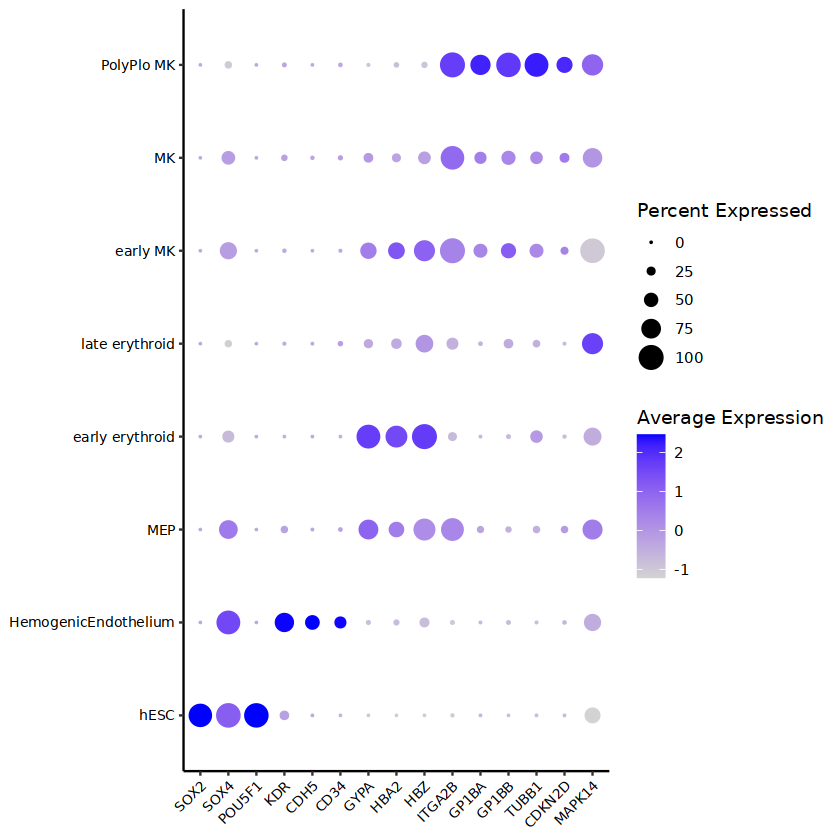

In [361]:
dotplot3<-DotPlot(
  adata,
    features=c(markers),
  assay = "SCT",
    group.by="Integrated_annotation")+
ylab('Clusters')+
xlab('Marker genes')+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans", size=8),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans", size=8))

dotplot3

## new path_graphs

In [362]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"


In [363]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

In [364]:
setwd(path_graphs)

svgname<-paste("Dotplot_marker_genes_by_Integrated_annotation",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


# Pick up and check funny cluster 6

In [3]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

In [4]:
adata<-readRDS(file="merged_clusters_after_genotyping_after_refined_annotation_new_peaks_rpca_integrate_rpca_annotation.rds")

In [5]:
adata

An object of class Seurat 
751343 features across 16835 samples within 6 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 2 dimensional reductions calculated: pca, umap

In [40]:
colnames(adata@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

# QC Plots

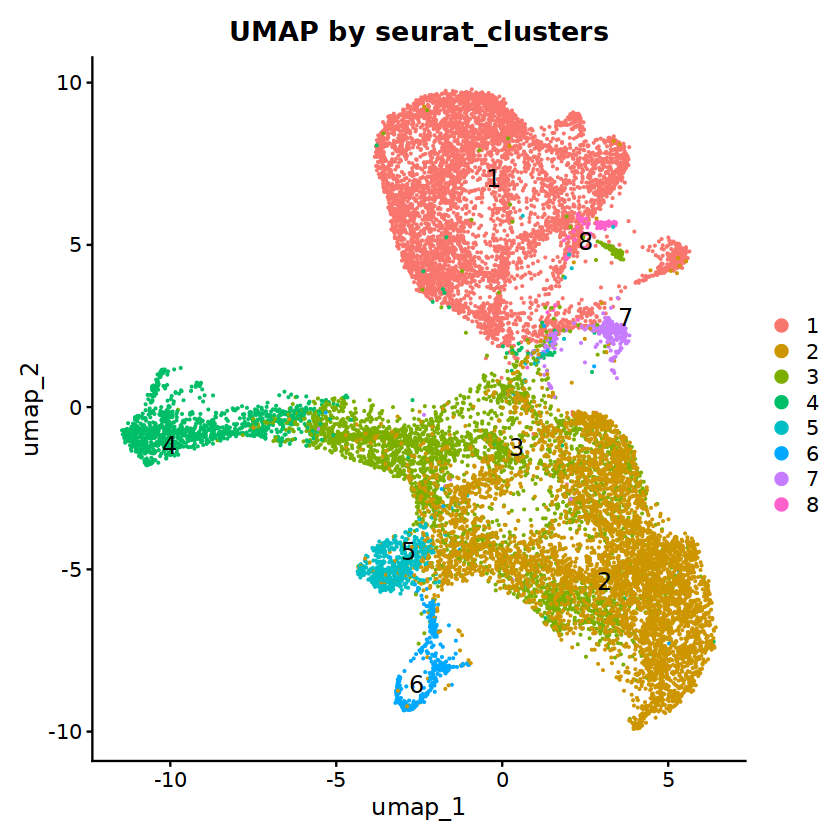

In [6]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

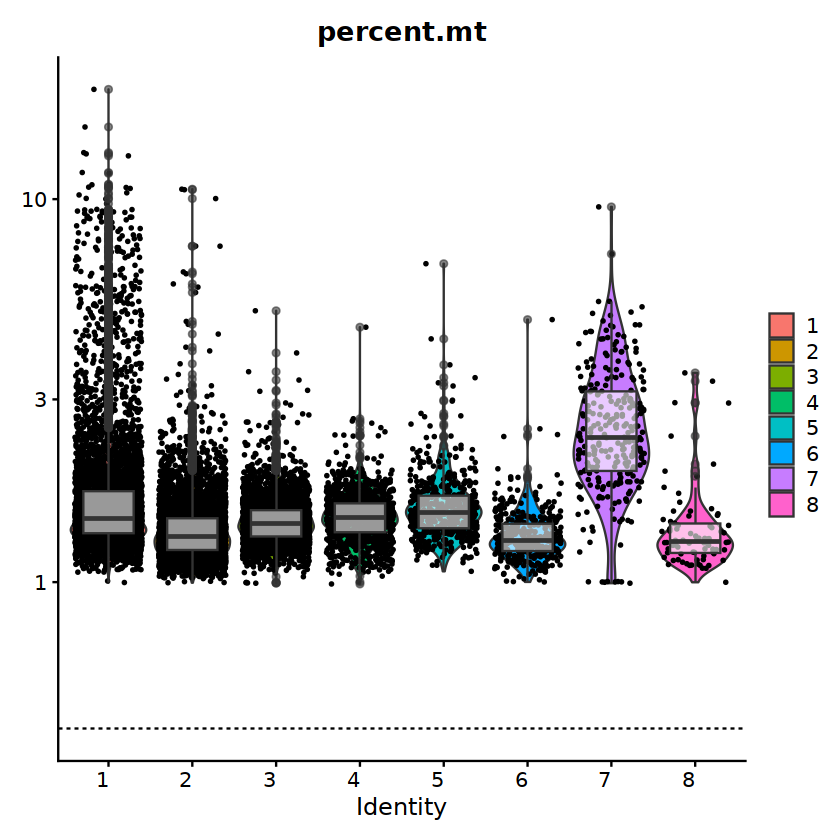

In [12]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10


In [13]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_percent.mt.png')
p10
dev.off()

png 
  2

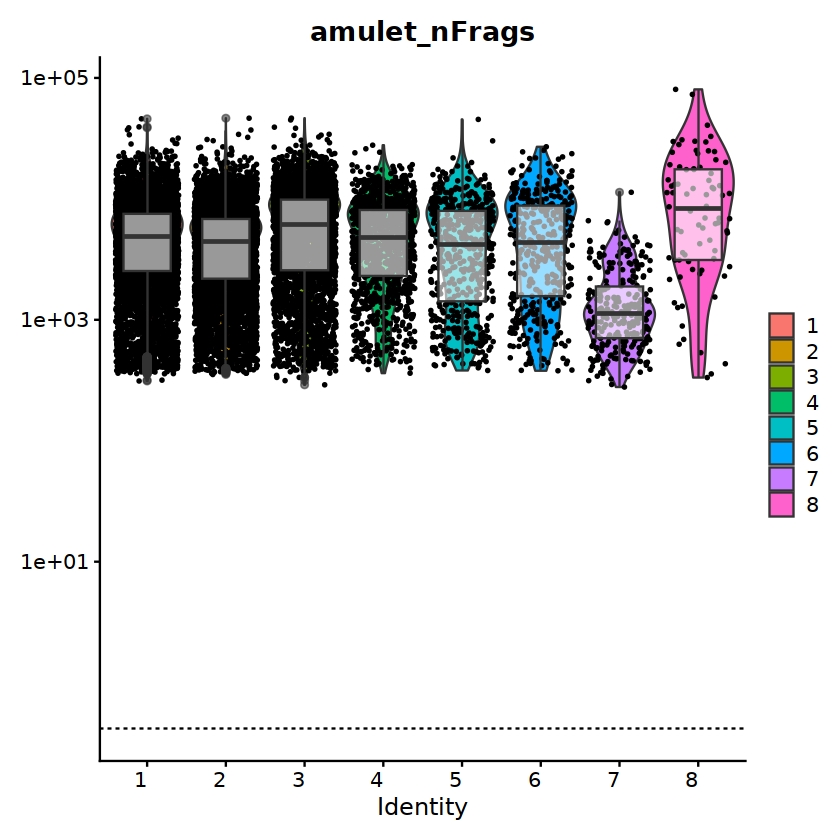

In [14]:
p10 <- VlnPlot(adata, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [15]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_amulet_nFrags.png')
p10
dev.off()

png 
  2

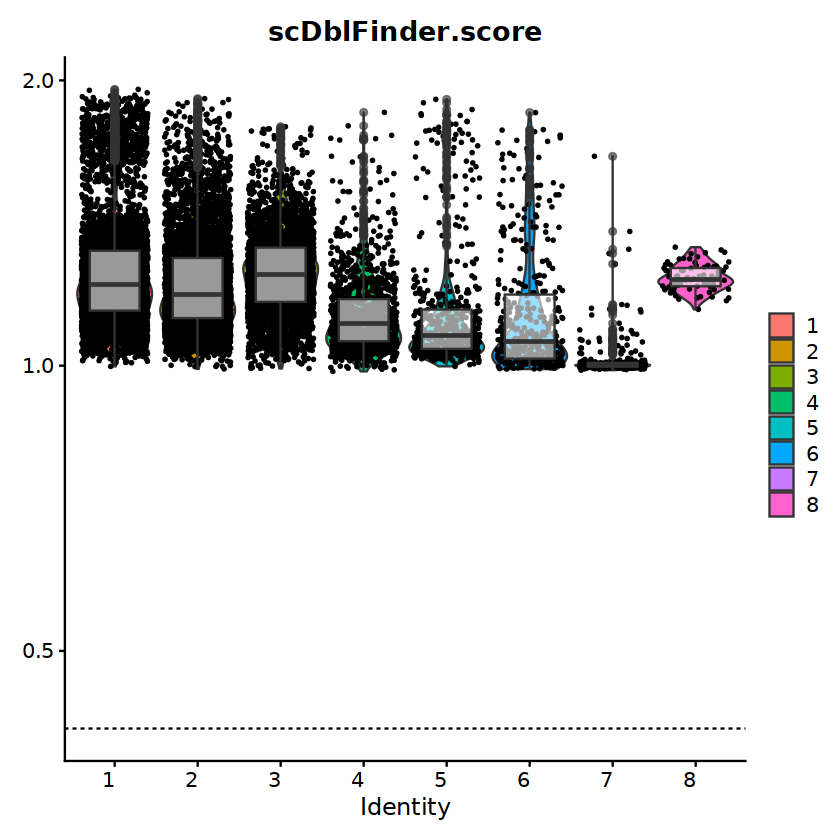

In [16]:
p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [17]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_scDblFinder.score.png')
p10
dev.off()

png 
  2

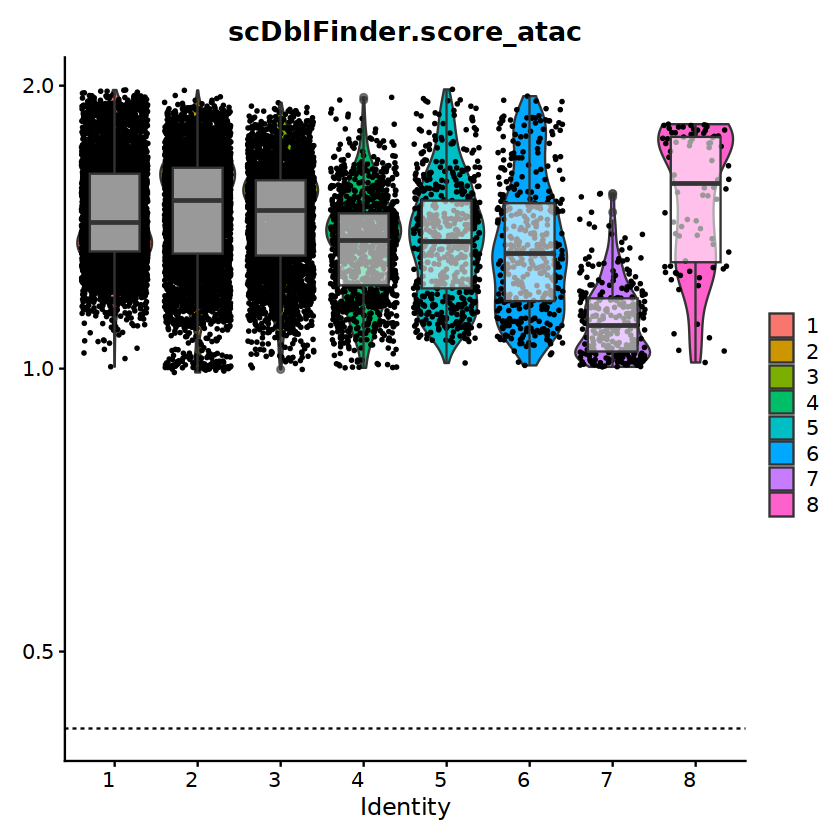

In [18]:
p10 <- VlnPlot(adata, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [19]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_scDblFinder.score_atac.png')
p10
dev.off()

png 
  2

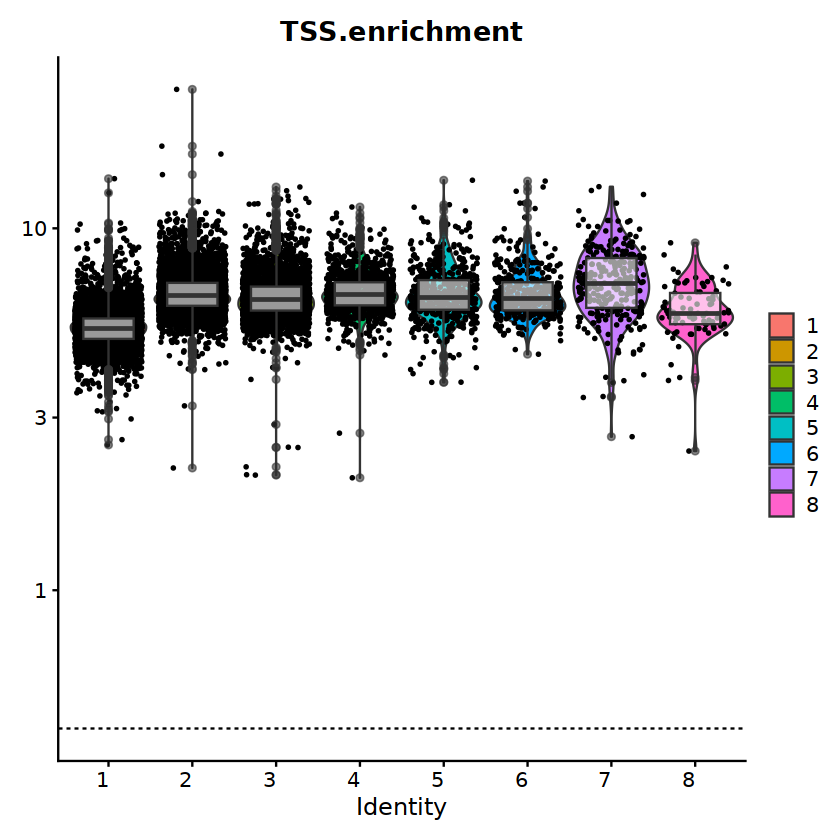

In [20]:
p10 <- VlnPlot(adata, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [21]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_TSS.enrichment.png')
p10
dev.off()

png 
  2

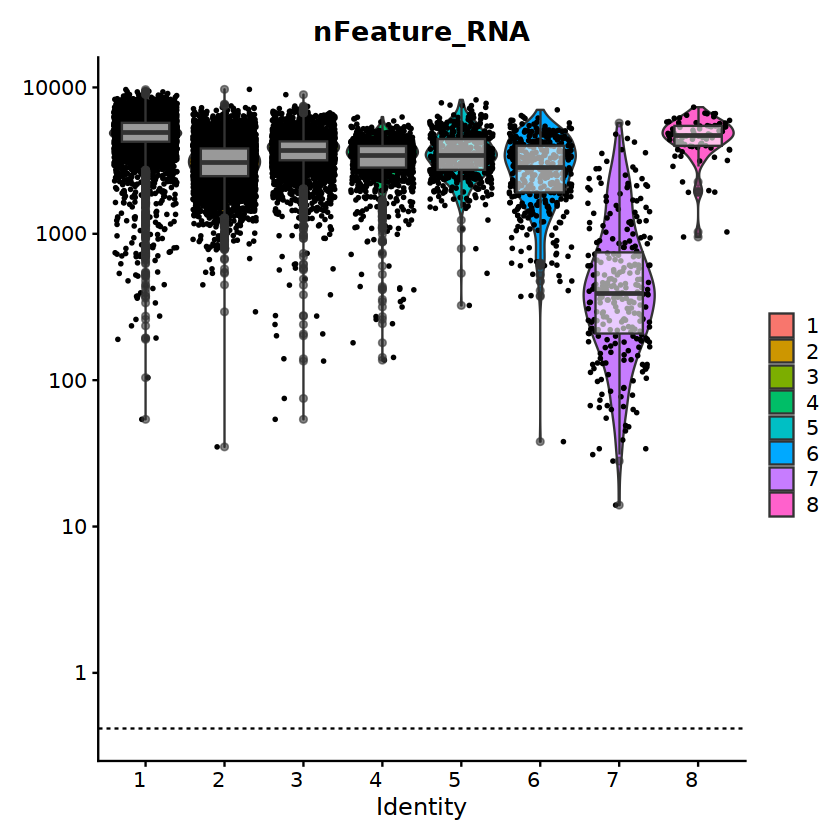

In [22]:
p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [23]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_nFeature_RNA.png')
p10
dev.off()

png 
  2

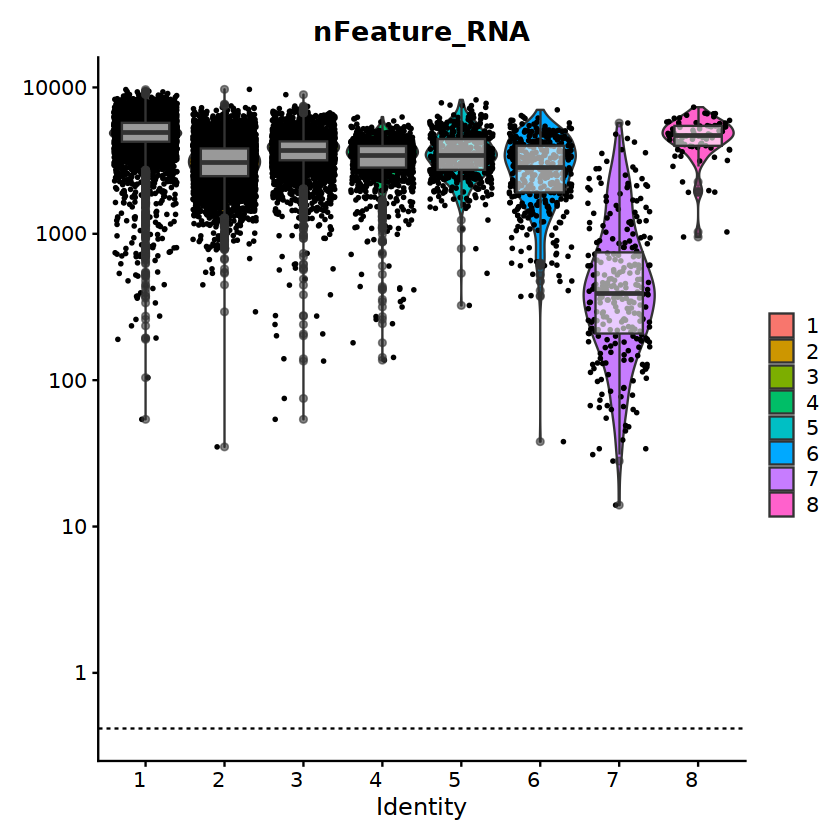

In [22]:
p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [23]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_nFeature_RNA.png')
p10
dev.off()

png 
  2

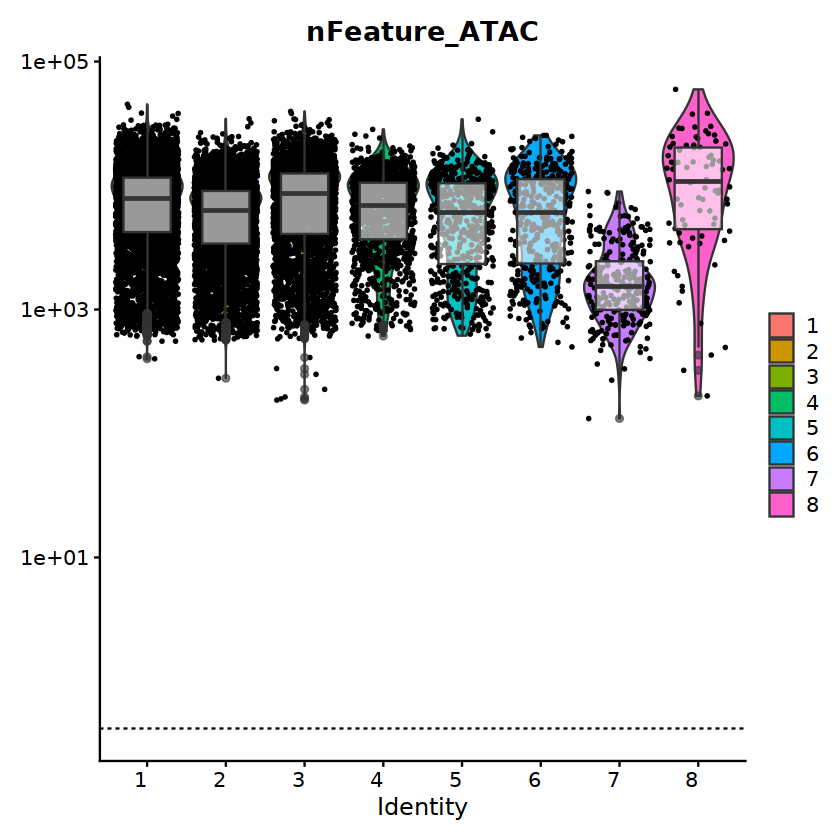

In [24]:
p10 <- VlnPlot(adata, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) +
geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')+ theme(axis.text.x=element_text(angle=0,family="sans"))

p10

In [25]:
setwd(setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/"))
png(file='Vln_nFeature_ATAC.png')
p10
dev.off()

png 
  2

## Stacked barplots

### CellTypist_BMA_label_filtered vs seurat_clusters

In [65]:
met<-adata[[]]

In [66]:
#colnames(met)

In [67]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_BMA_label_filtered"))

In [68]:
#str(met.dt)

In [69]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [70]:
met.dt<-data.table(met, key=c("seurat_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [71]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [72]:
str(Freq.table)

'data.frame':	36 obs. of  5 variables:
 $ seurat_clusters              : chr  "1" "1" "1" "1" ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 1 1502 45 9 3377 2 ...
 $ TOTAL                        : int  5853 5853 5853 5853 5853 4936 4936 4936 4936 4936 ...
 $ Perc                         : num  50.83 0.31 36.63 12.22 0.02 ...


In [73]:
met.dt<-data.table(met, key=c("CellTypist_BMA_label_filtered"))
Freq.table_BMA<-as.data.frame(met.dt[,.(Freq_CellTypist_BMA_label_filtered=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.table_BMA,
                  by=c("CellTypist_BMA_label_filtered"))

#Freq.table

In [74]:
str(Freq.table)

'data.frame':	36 obs. of  6 variables:
 $ CellTypist_BMA_label_filtered     : chr  "DC3" "DC3" "DC3" "DC3" ...
 $ seurat_clusters                   : chr  "3" "6" "2" "4" ...
 $ Freq                              : int  575 71 45 55 4 1 389 1 51 18 ...
 $ TOTAL                             : int  3589 392 4936 1173 3589 274 1173 3589 274 5853 ...
 $ Perc                              : num  16.02 18.11 0.91 4.69 0.11 ...
 $ Freq_CellTypist_BMA_label_filtered: int  746 746 746 746 394 394 394 72 72 72 ...


In [75]:
vector_colors_CellTypist_BMA_label_filtered<-c(brewer.pal(9, "Set1"),"white")

-------------------------------------->	0 25 50 75 100


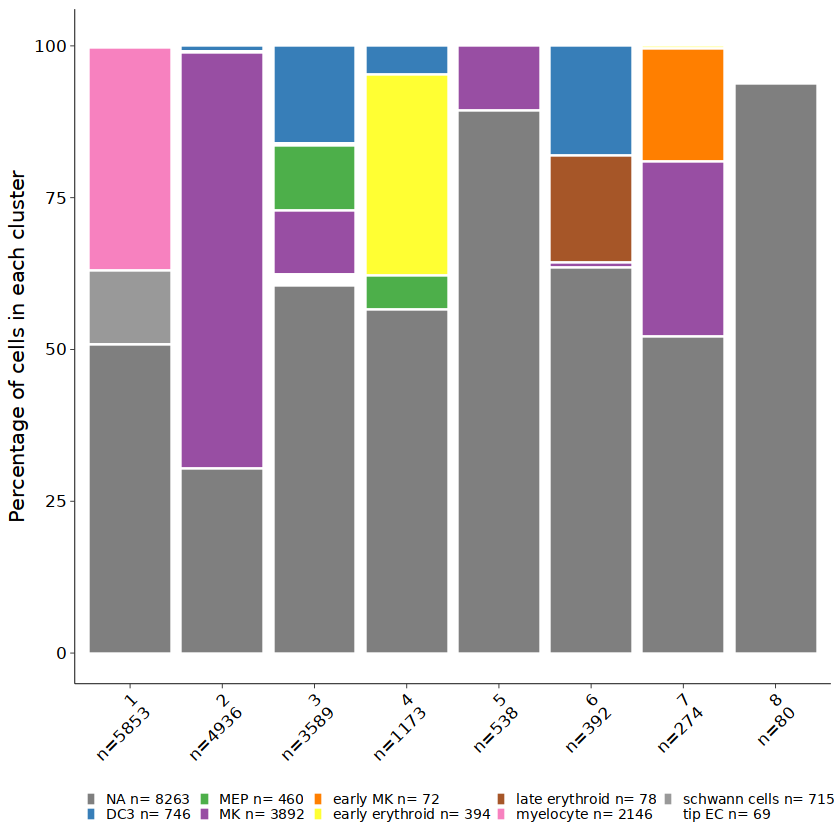

In [76]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table %>%
    mutate(myaxis = paste0(seurat_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_BMA_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_BMA_label_filtered,
                      drop=F,
                      name="My Annotation", breaks=Freq.table_BMA$CellTypist_BMA_label_filtered,
                      labels=paste(Freq.table_BMA$CellTypist_BMA_label_filtered,
                                   Freq.table_BMA$Freq_CellTypist_BMA_label_filtered, sep =' n= '))+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")
  
  



stacked_barplot
  

## Show the time_point breakdown Freq tables CellTypist_BMA_label_filtered vs time_point vs seurat_clusters

In [90]:
met<-adata[[]]

In [91]:
met.dt<-data.table(met,key=c("time_point","seurat_clusters","CellTypist_BMA_label_filtered"))

In [92]:
#str(met.dt)

In [93]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [94]:
met.dt<-data.table(met, key=c("time_point","seurat_clusters"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [95]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [96]:
str(Freq.table)

'data.frame':	66 obs. of  6 variables:
 $ time_point                   : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 3 3 3 3 3 3 ...
 $ seurat_clusters              : chr  "1" "1" "1" "1" ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 7 1 24 2078 558 366 ...
 $ TOTAL                        : int  5852 5852 5852 5852 32 32 32 3384 3384 3384 ...
 $ Perc                         : num  50.84 0.31 36.64 12.22 21.88 ...


In [97]:
met.dt<-data.table(met, key=c("time_point"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)

Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by="time_point")

#Freq.table

In [98]:
str(Freq.table)

'data.frame':	66 obs. of  7 variables:
 $ time_point                   : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 3 3 3 3 3 3 ...
 $ seurat_clusters              : chr  "1" "1" "1" "1" ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 7 1 24 2078 558 366 ...
 $ TOTAL                        : int  5852 5852 5852 5852 32 32 32 3384 3384 3384 ...
 $ Perc                         : num  50.84 0.31 36.64 12.22 21.88 ...
 $ ntime                        : int  5852 5852 5852 5852 4905 4905 4905 4905 4905 4905 ...


In [99]:
Freq.TOTAL<-merge(Freq.TOTAL,
                  Freq.time_point,
                  by="time_point")

In [100]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]

str(Freq.table_filtered)

'data.frame':	60 obs. of  7 variables:
 $ time_point                   : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 3 3 3 3 3 3 ...
 $ seurat_clusters              : chr  "1" "1" "1" "1" ...
 $ CellTypist_BMA_label_filtered: chr  NA "early MK" "myelocyte" "schwann cells" ...
 $ Freq                         : int  2975 18 2144 715 7 1 24 2078 558 366 ...
 $ TOTAL                        : int  5852 5852 5852 5852 32 32 32 3384 3384 3384 ...
 $ Perc                         : num  50.84 0.31 36.64 12.22 21.88 ...
 $ ntime                        : int  5852 5852 5852 5852 4905 4905 4905 4905 4905 4905 ...


In [101]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

-------------------------------------->	0 25 50 75 100


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


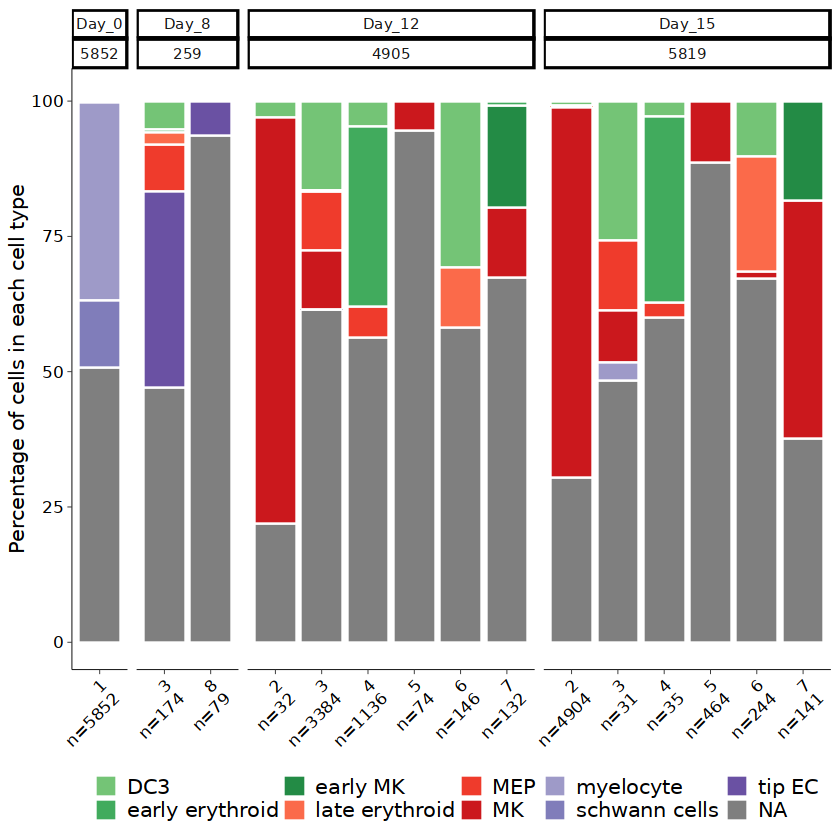

In [102]:
#### Stacked Graph #2---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, "\n", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=CellTypist_BMA_label_filtered)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="My Annotation")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ time_point+ntime, scales='free_x', space='free_x', switch="y", labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime)))+   
    scale_x_discrete(name="Seurat clusters", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [748]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_rpca/graphs_rpca/")

svgname<-paste("stacked_barplot_time_point_Integrated_annotation_vs_clone_line",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png",
        width=12, height=8)
}

## Back to UMPA

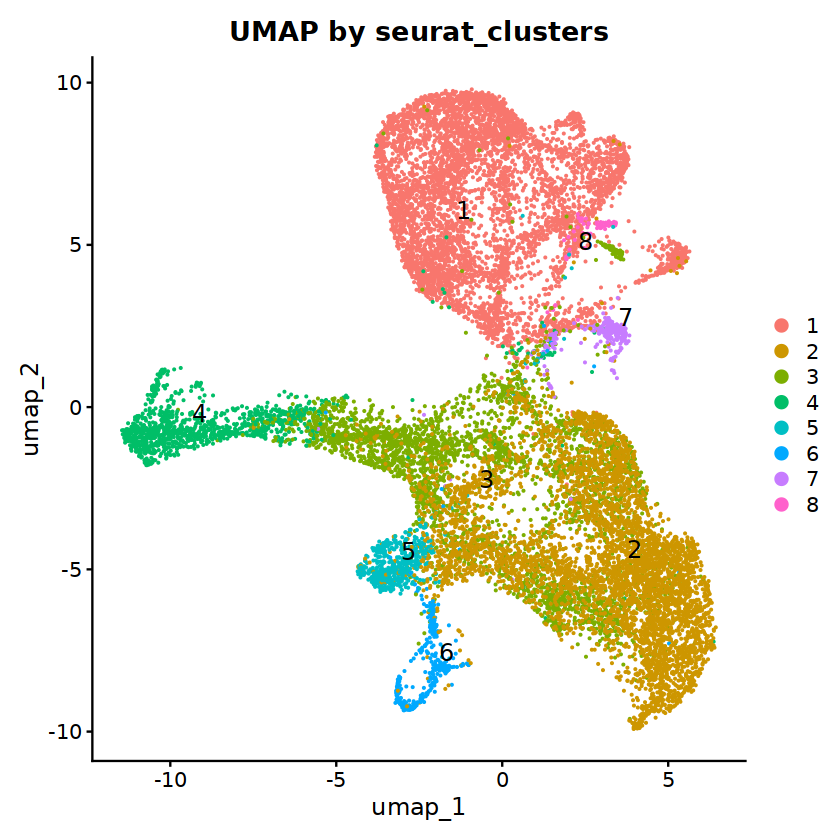

In [38]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

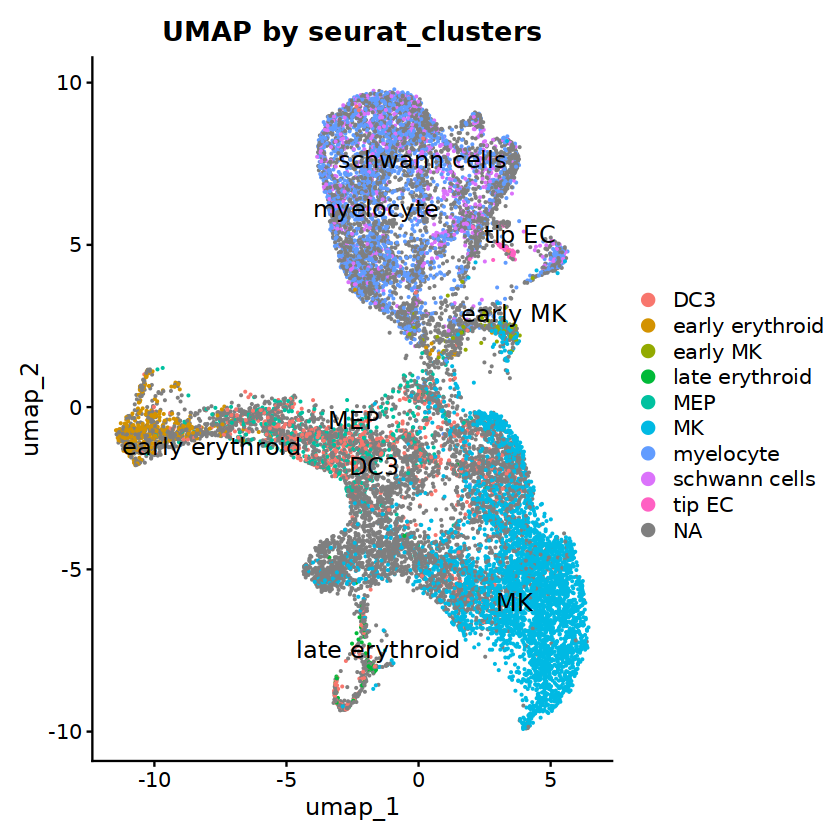

In [39]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "CellTypist_BMA_label_filtered", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

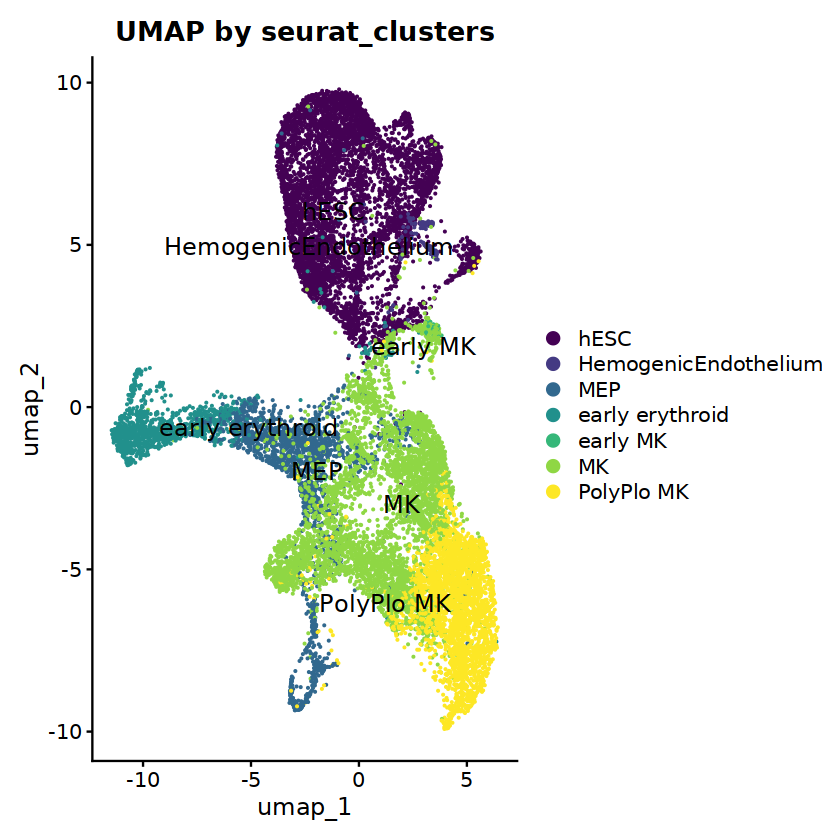

In [41]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "Integrated_annotation", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3

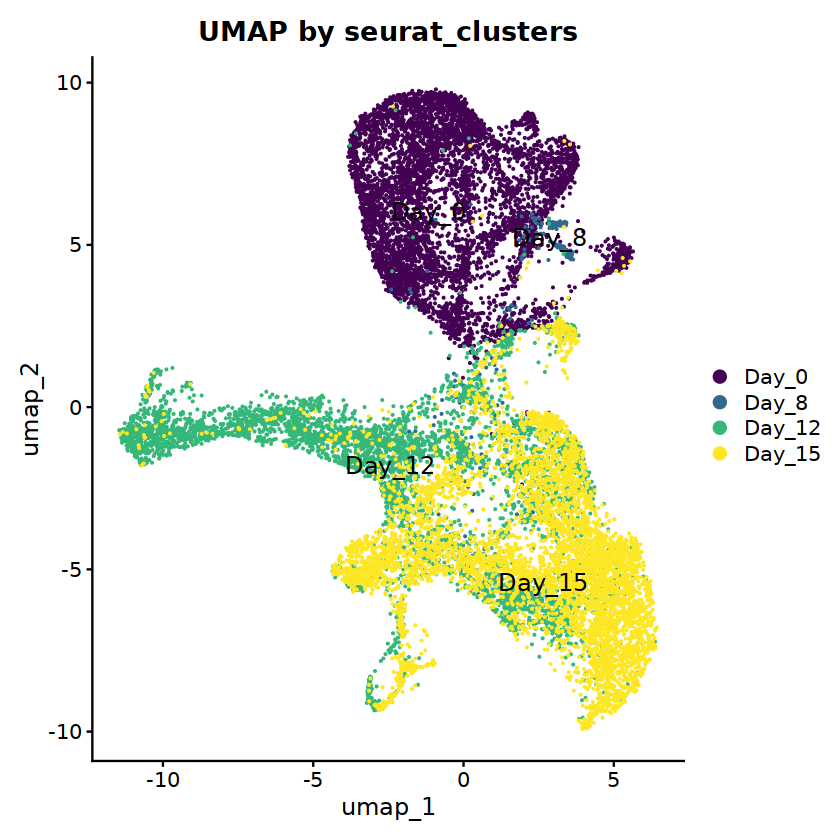

In [42]:
p3 <- DimPlot(adata, reduction = "umap", group.by = "time_point", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("UMAP by seurat_clusters")
p3